# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import friedmanchisquare, sem, t, wilcoxon
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations
from sklearn.decomposition import PCA
from datetime import timedelta
from sklearn.svm  import SVC

In [ ]:
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300,
    'legend.frameon': True,
})

# Análise e tratamento dos dados

In [ ]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Número de linhas: {df.shape[0]} | Número de colunas: {df.shape[1]}")

Número de linhas duplicadas: 240
Número de linhas: 1359 | Número de colunas: 12


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

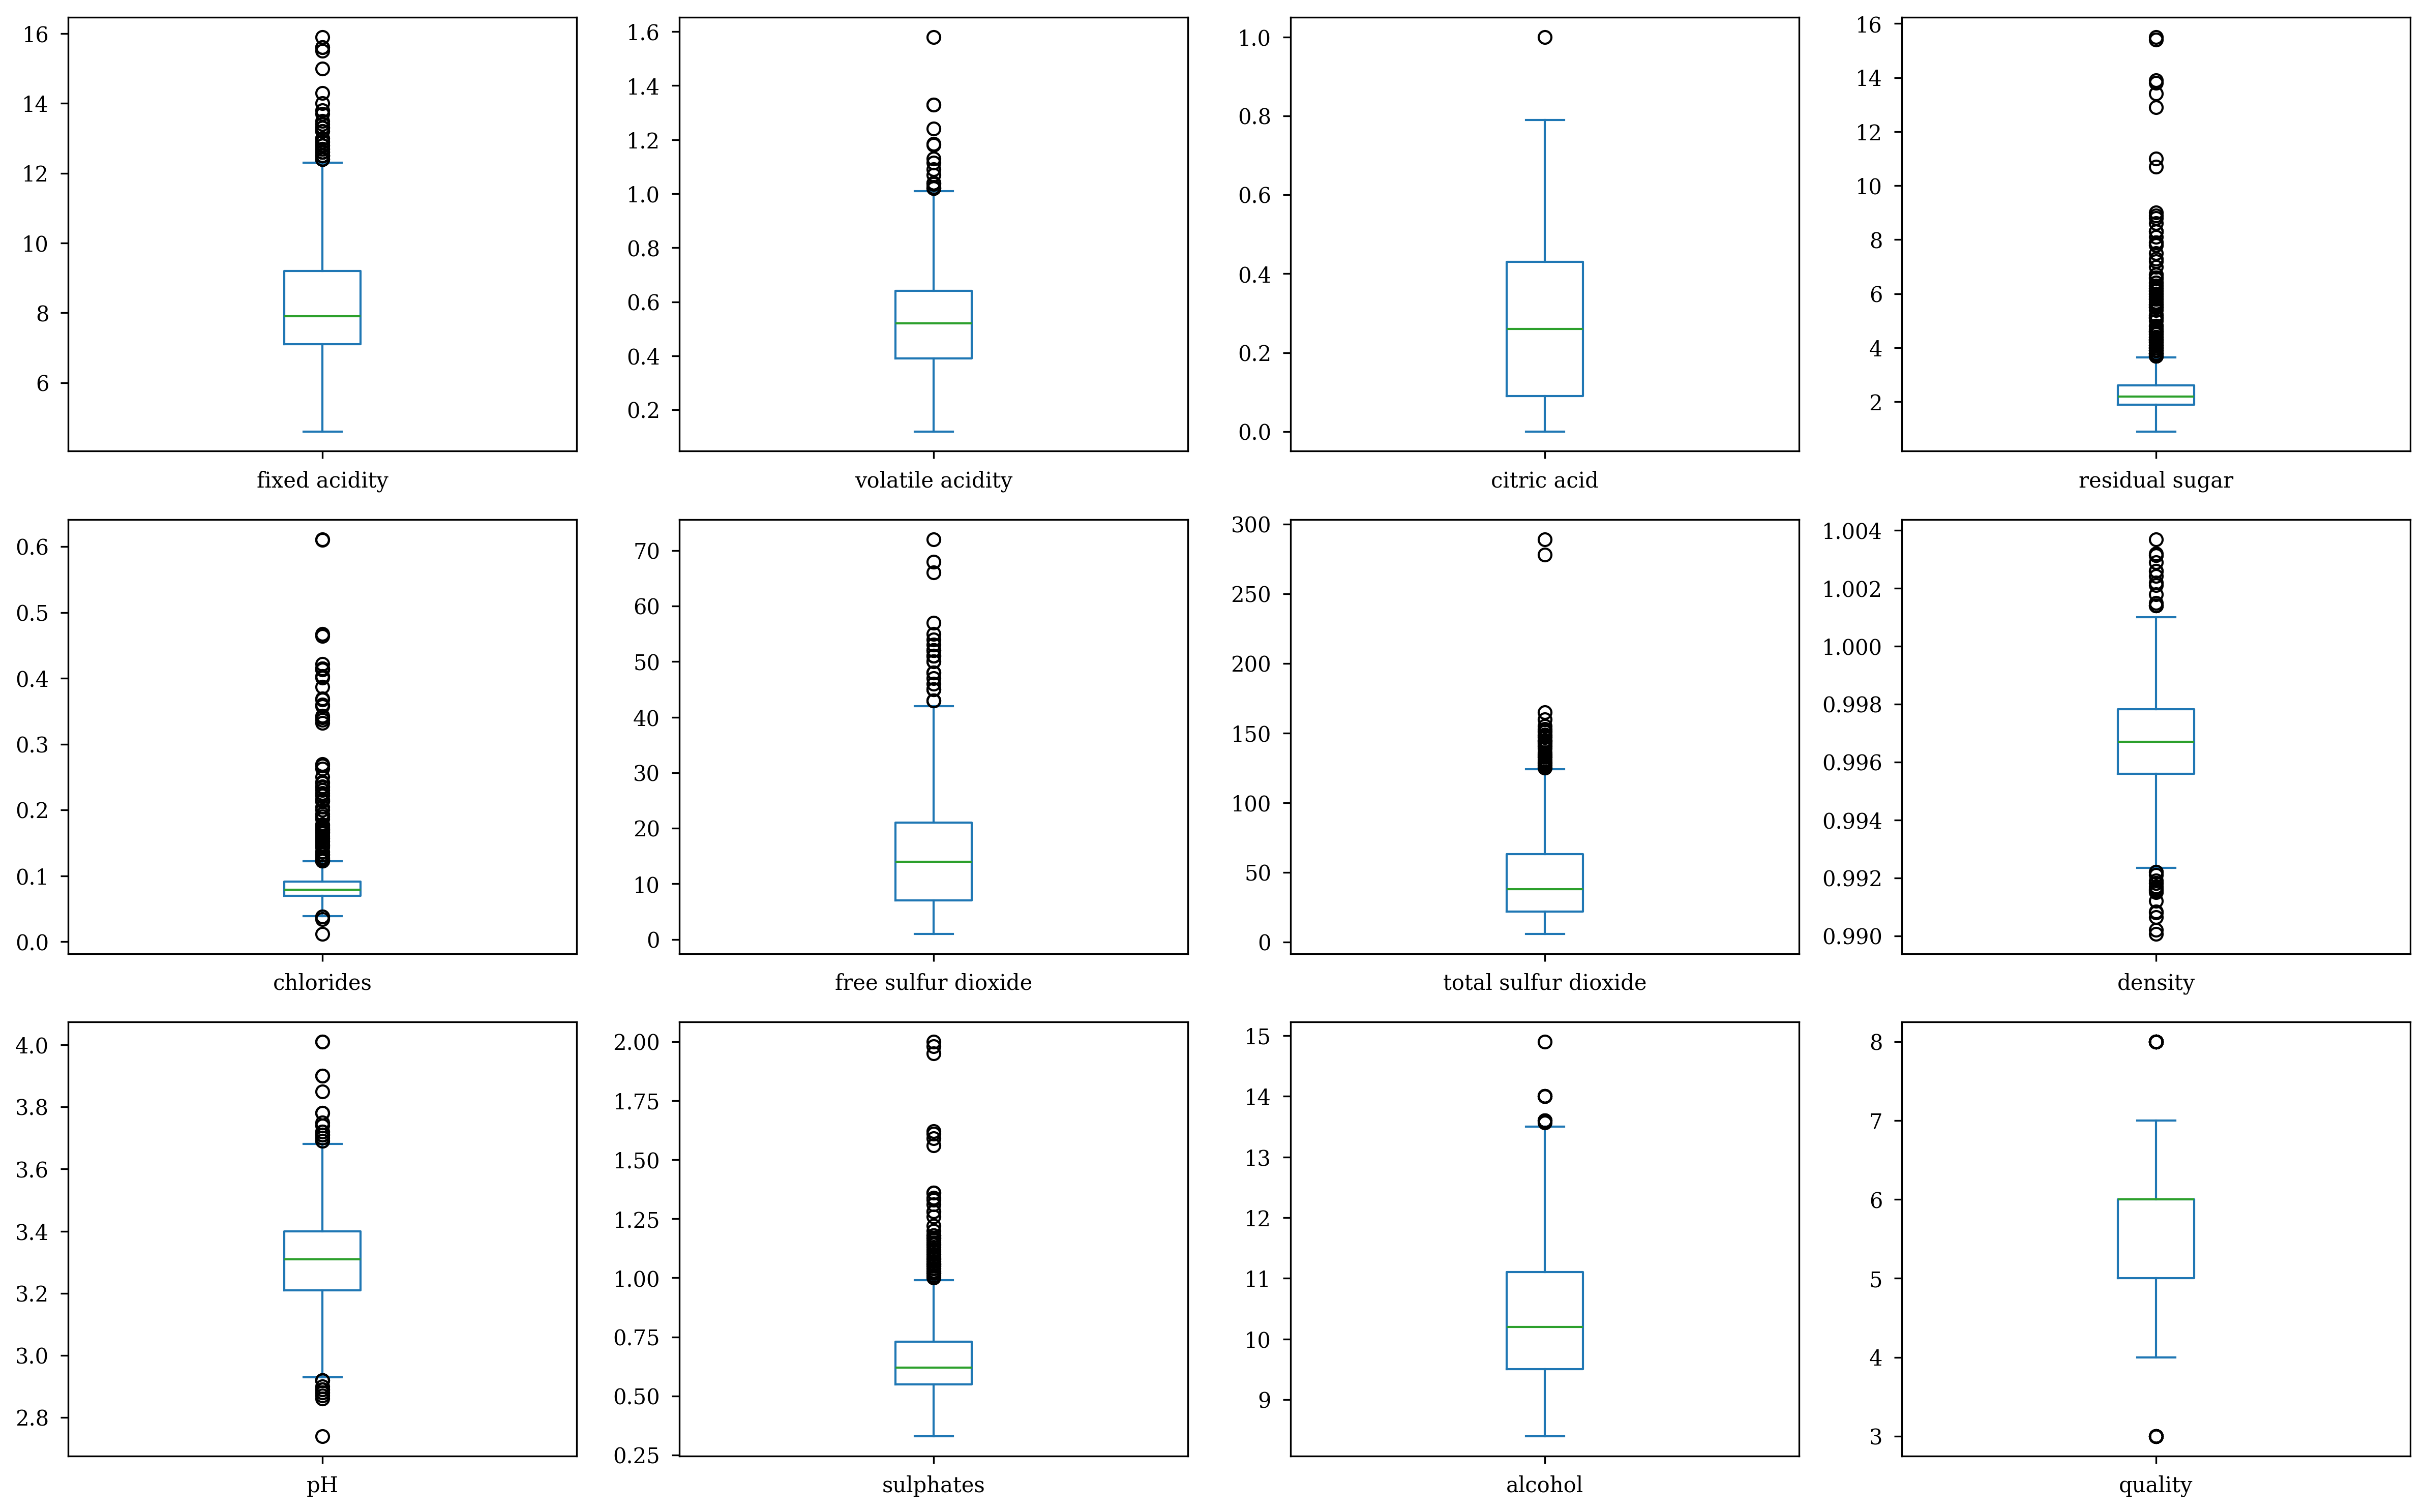

In [ ]:
df.plot(kind='box', subplots=True, layout=(3, 4), figsize=(16, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

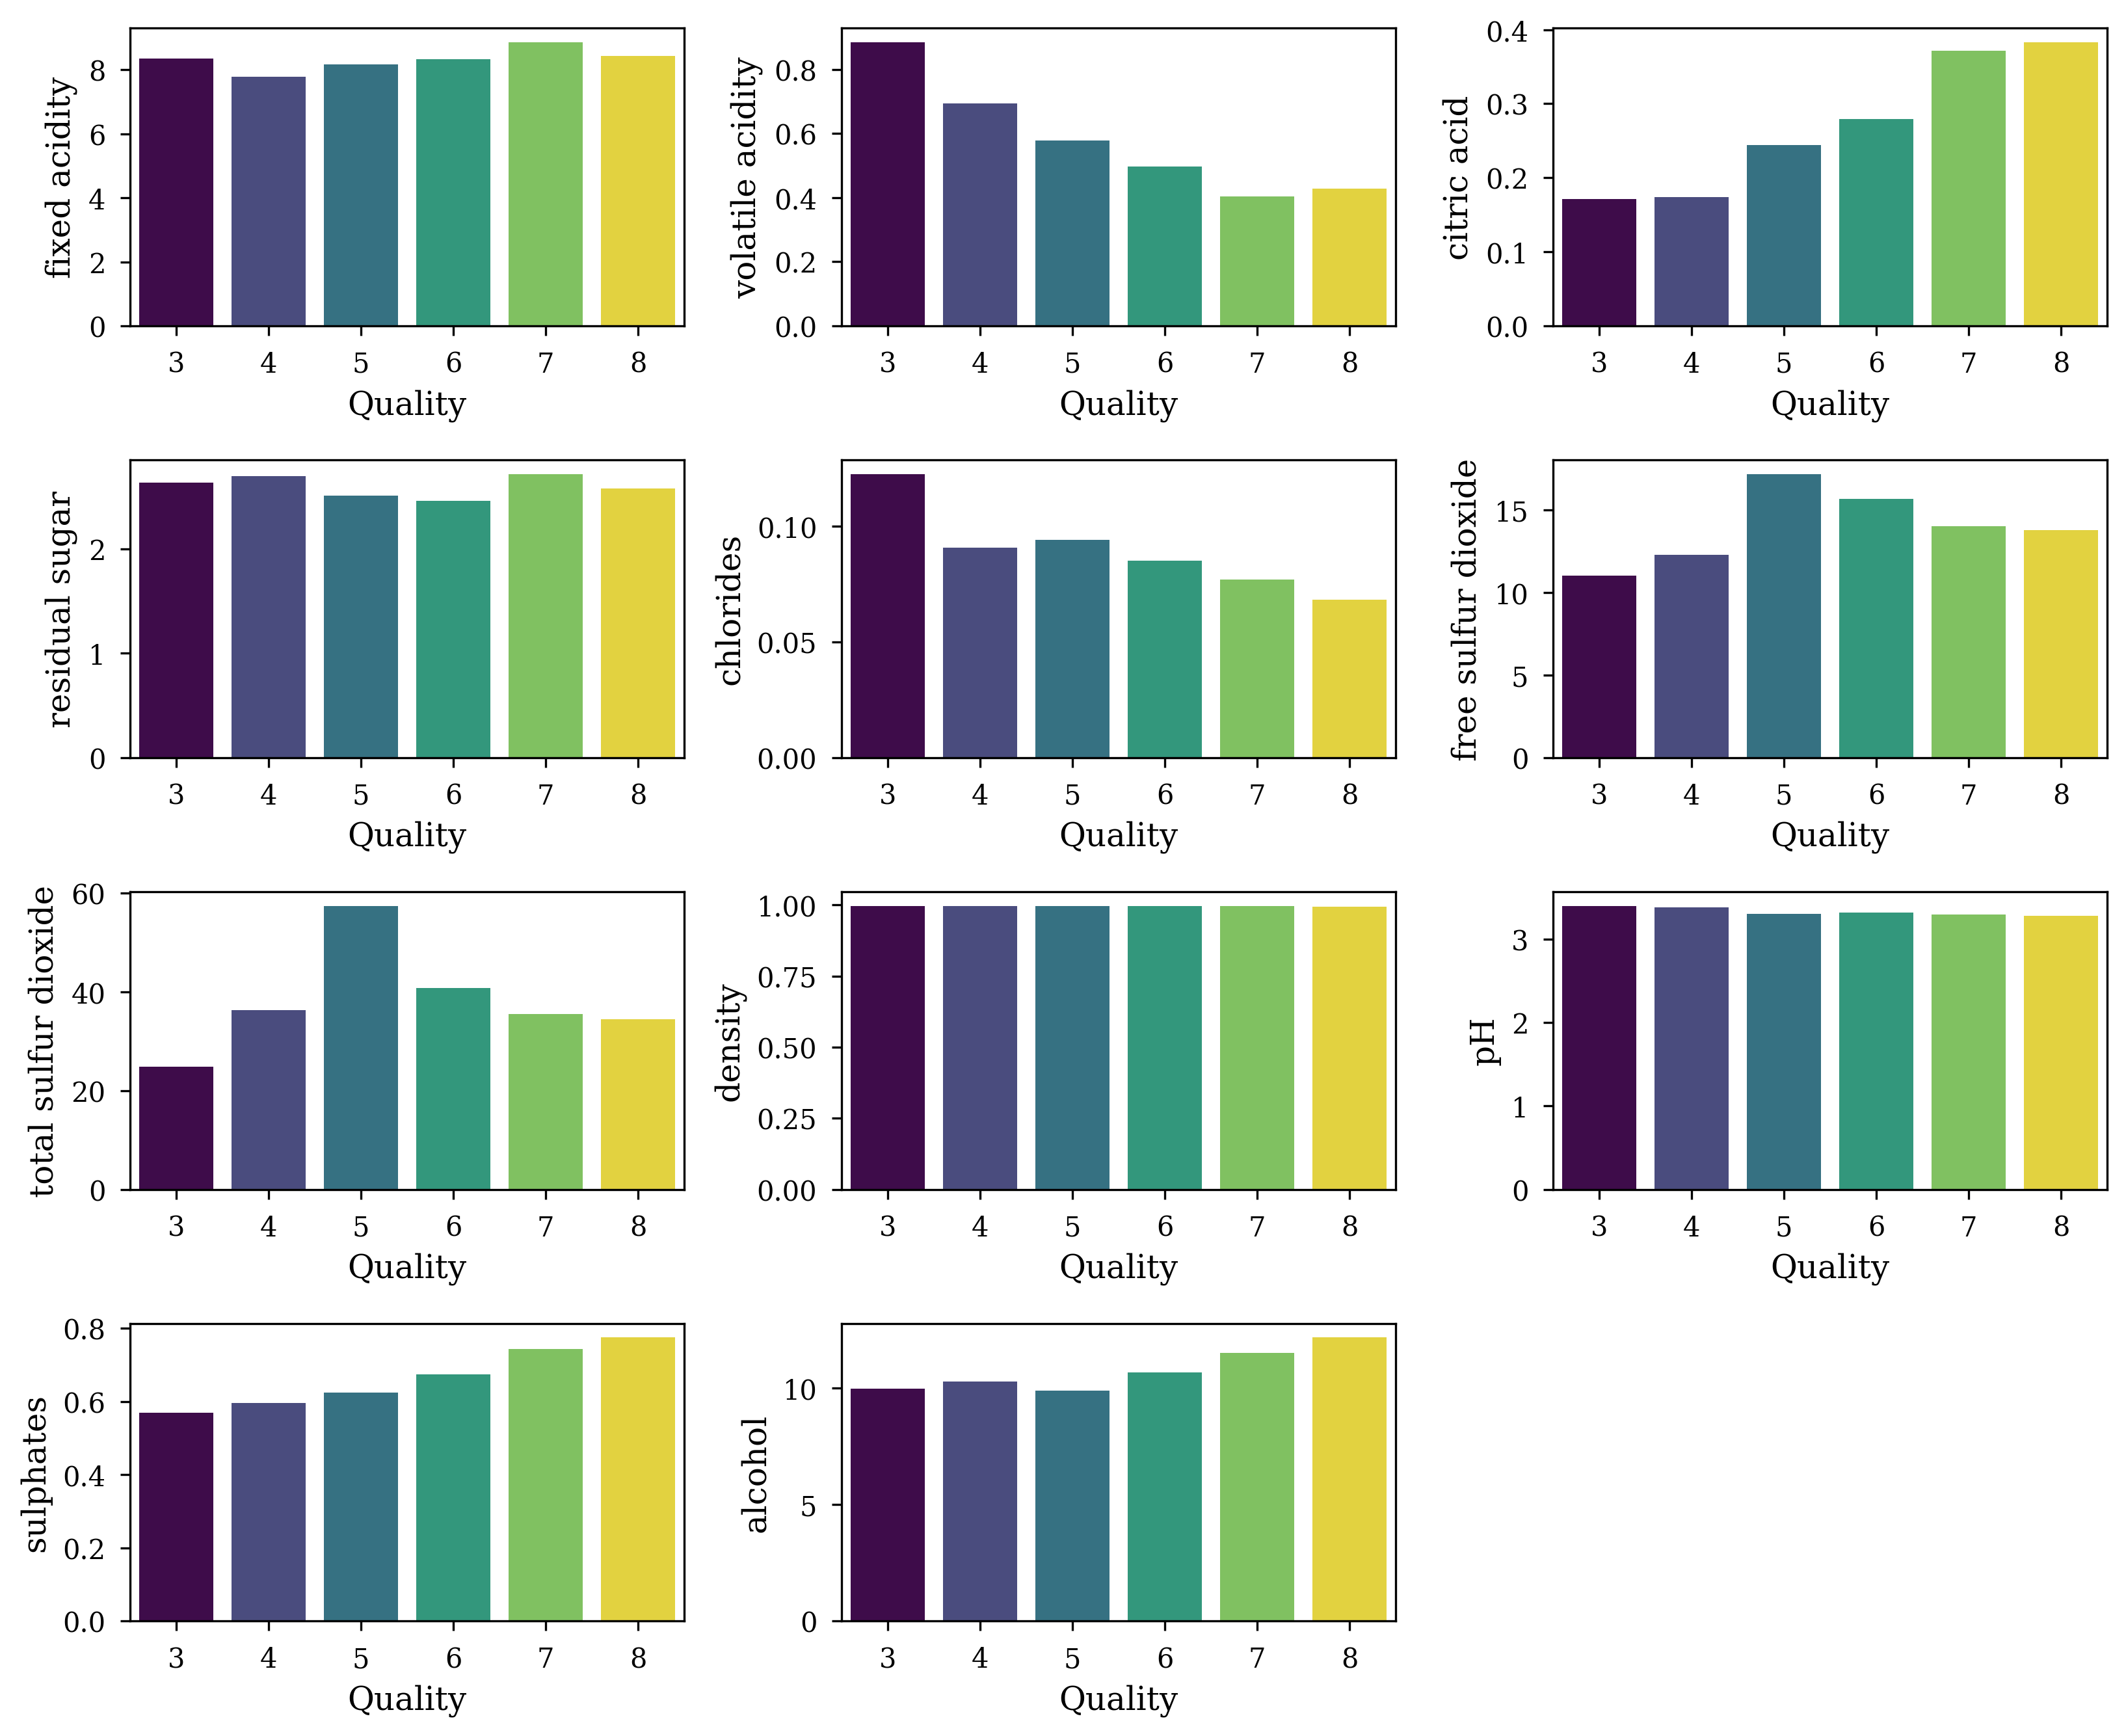

In [ ]:
plt.figure(figsize=(11,9))
plotnumber=1

cont_col = [col for col in df.columns if col != 'quality']

for column in cont_col:
    ax=plt.subplot(4,3,plotnumber)
    sns.barplot(x='quality', y=df[column], data=df, palette = 'viridis', errorbar=None, hue='quality', legend=False)

    plt.xlabel('Quality')
    plt.ylabel(column)
    plotnumber+=1
plt.tight_layout()

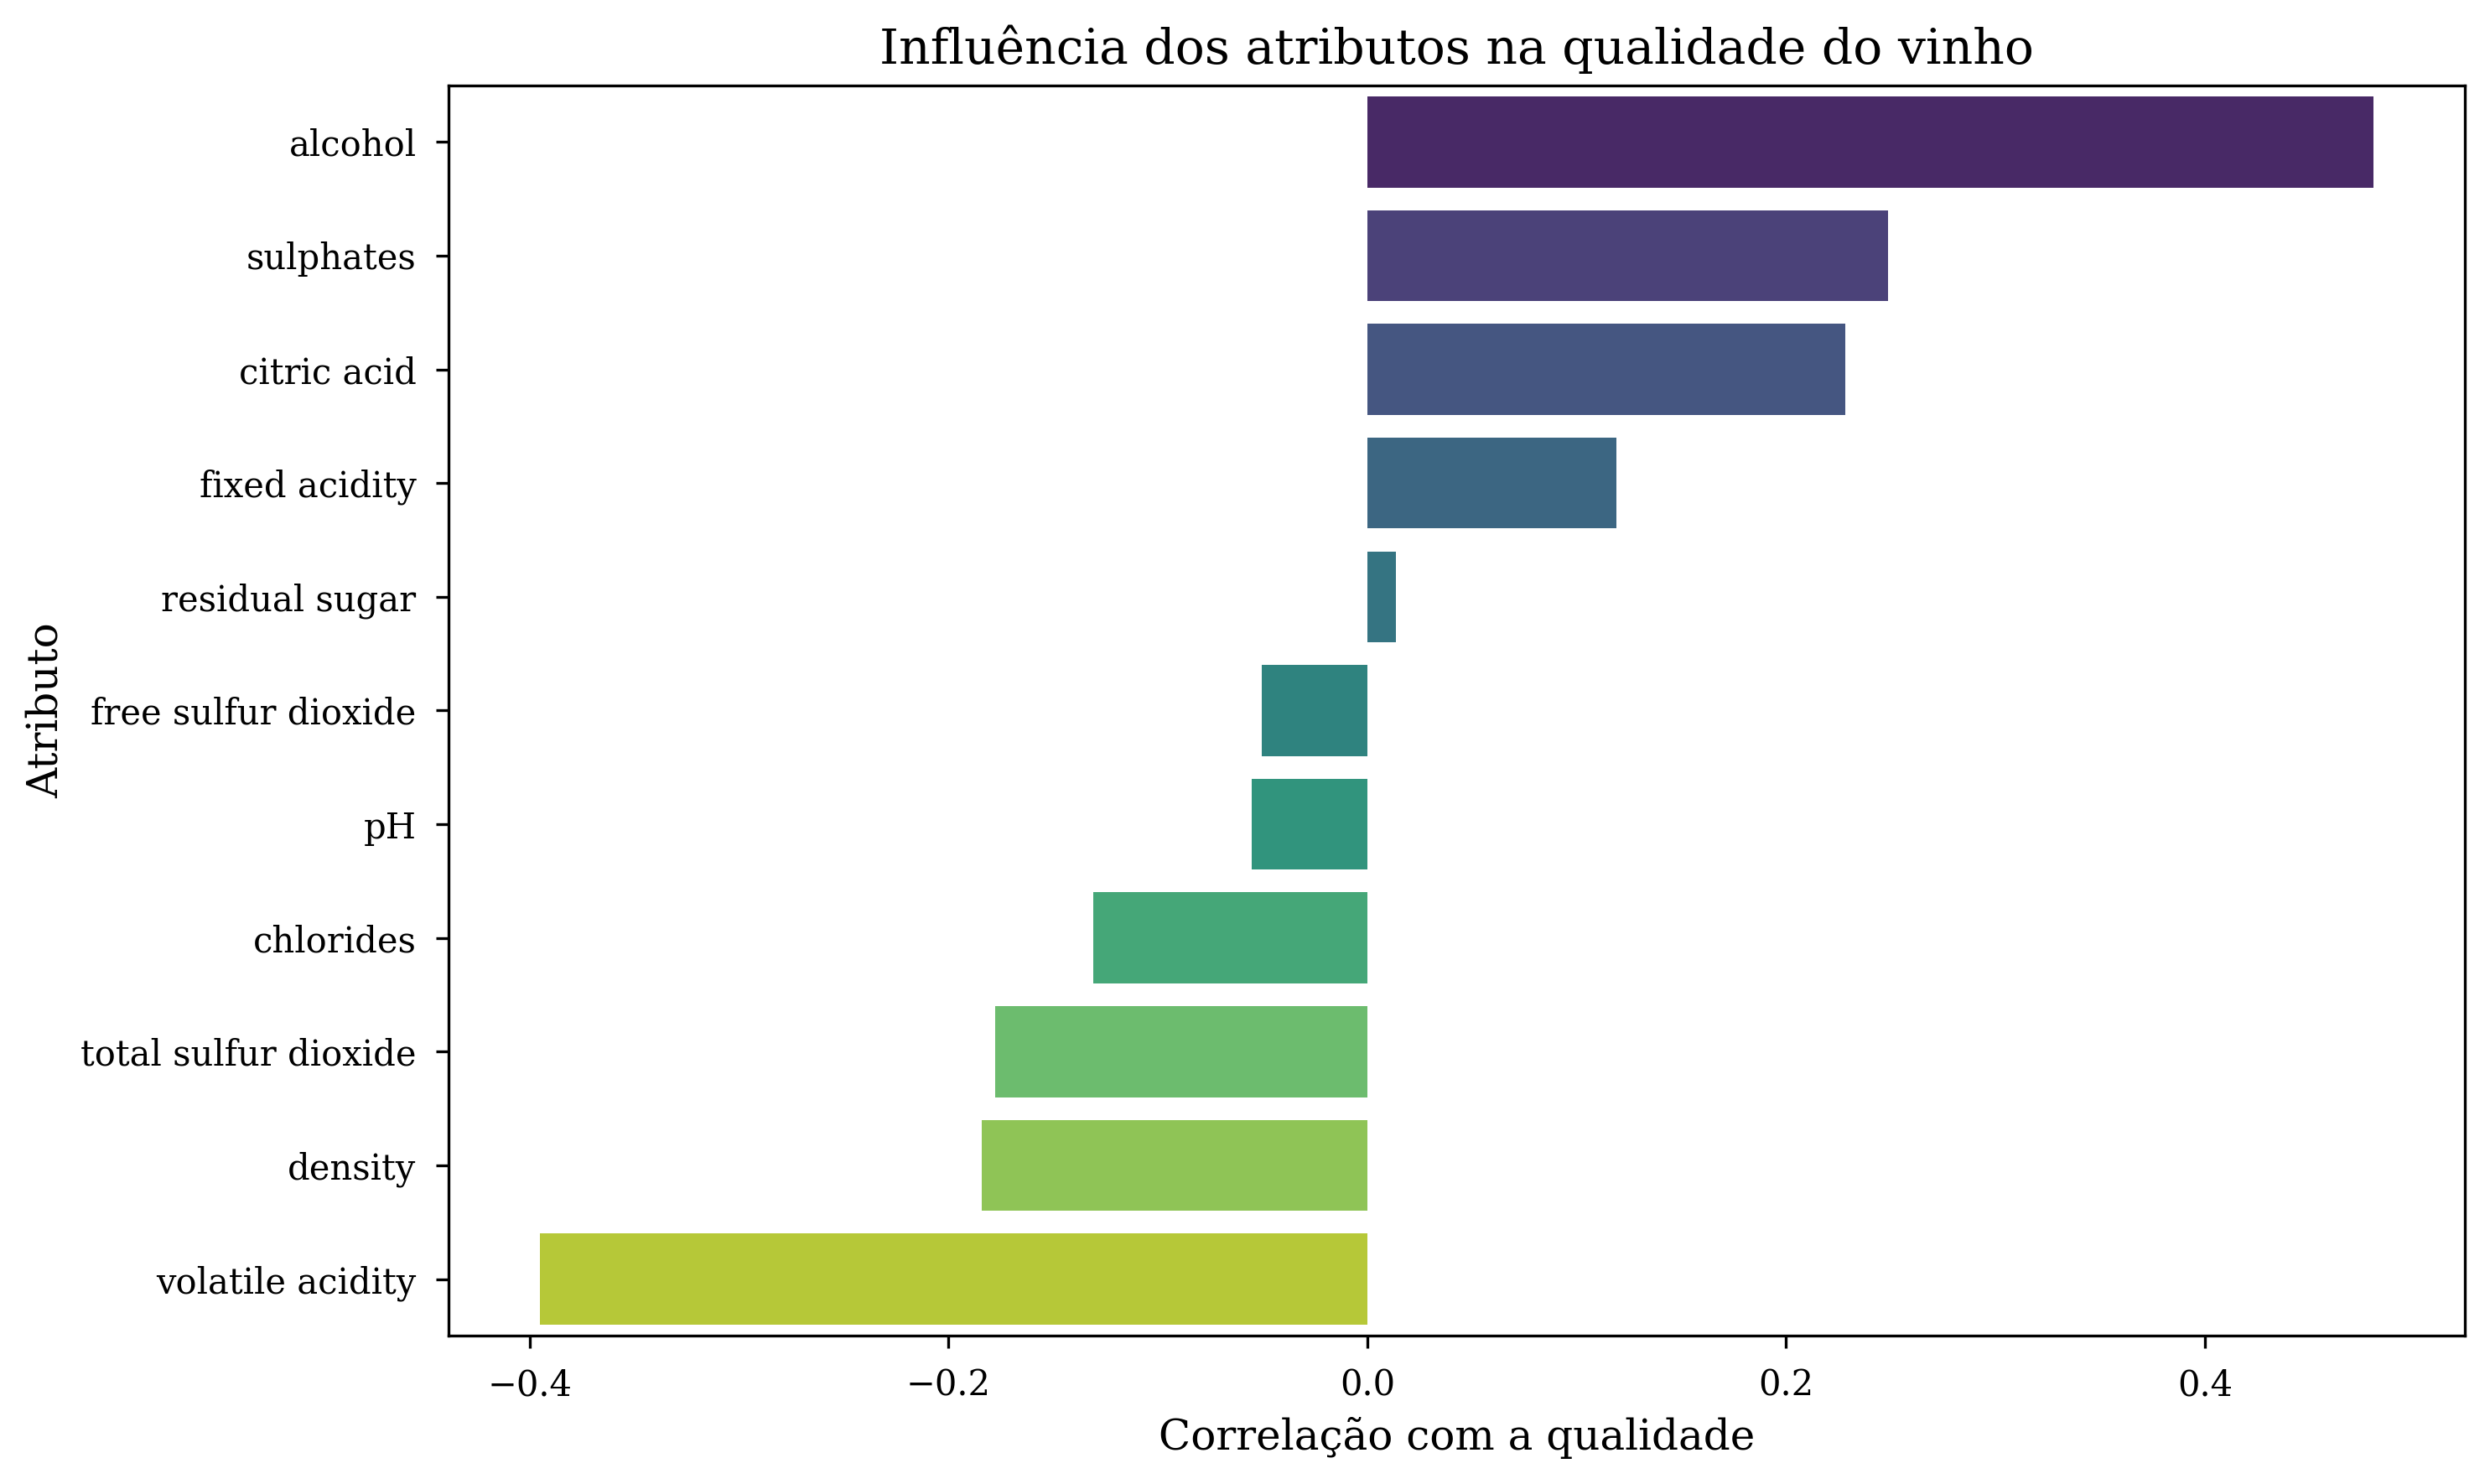

In [ ]:
correlations = df.corr(numeric_only=True)['quality'].drop('quality').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis', hue=correlations.index, legend=False)
plt.xlabel('Correlação com a qualidade')
plt.ylabel('Atributo')
plt.title('Influência dos atributos na qualidade do vinho')
plt.tight_layout()
plt.show()

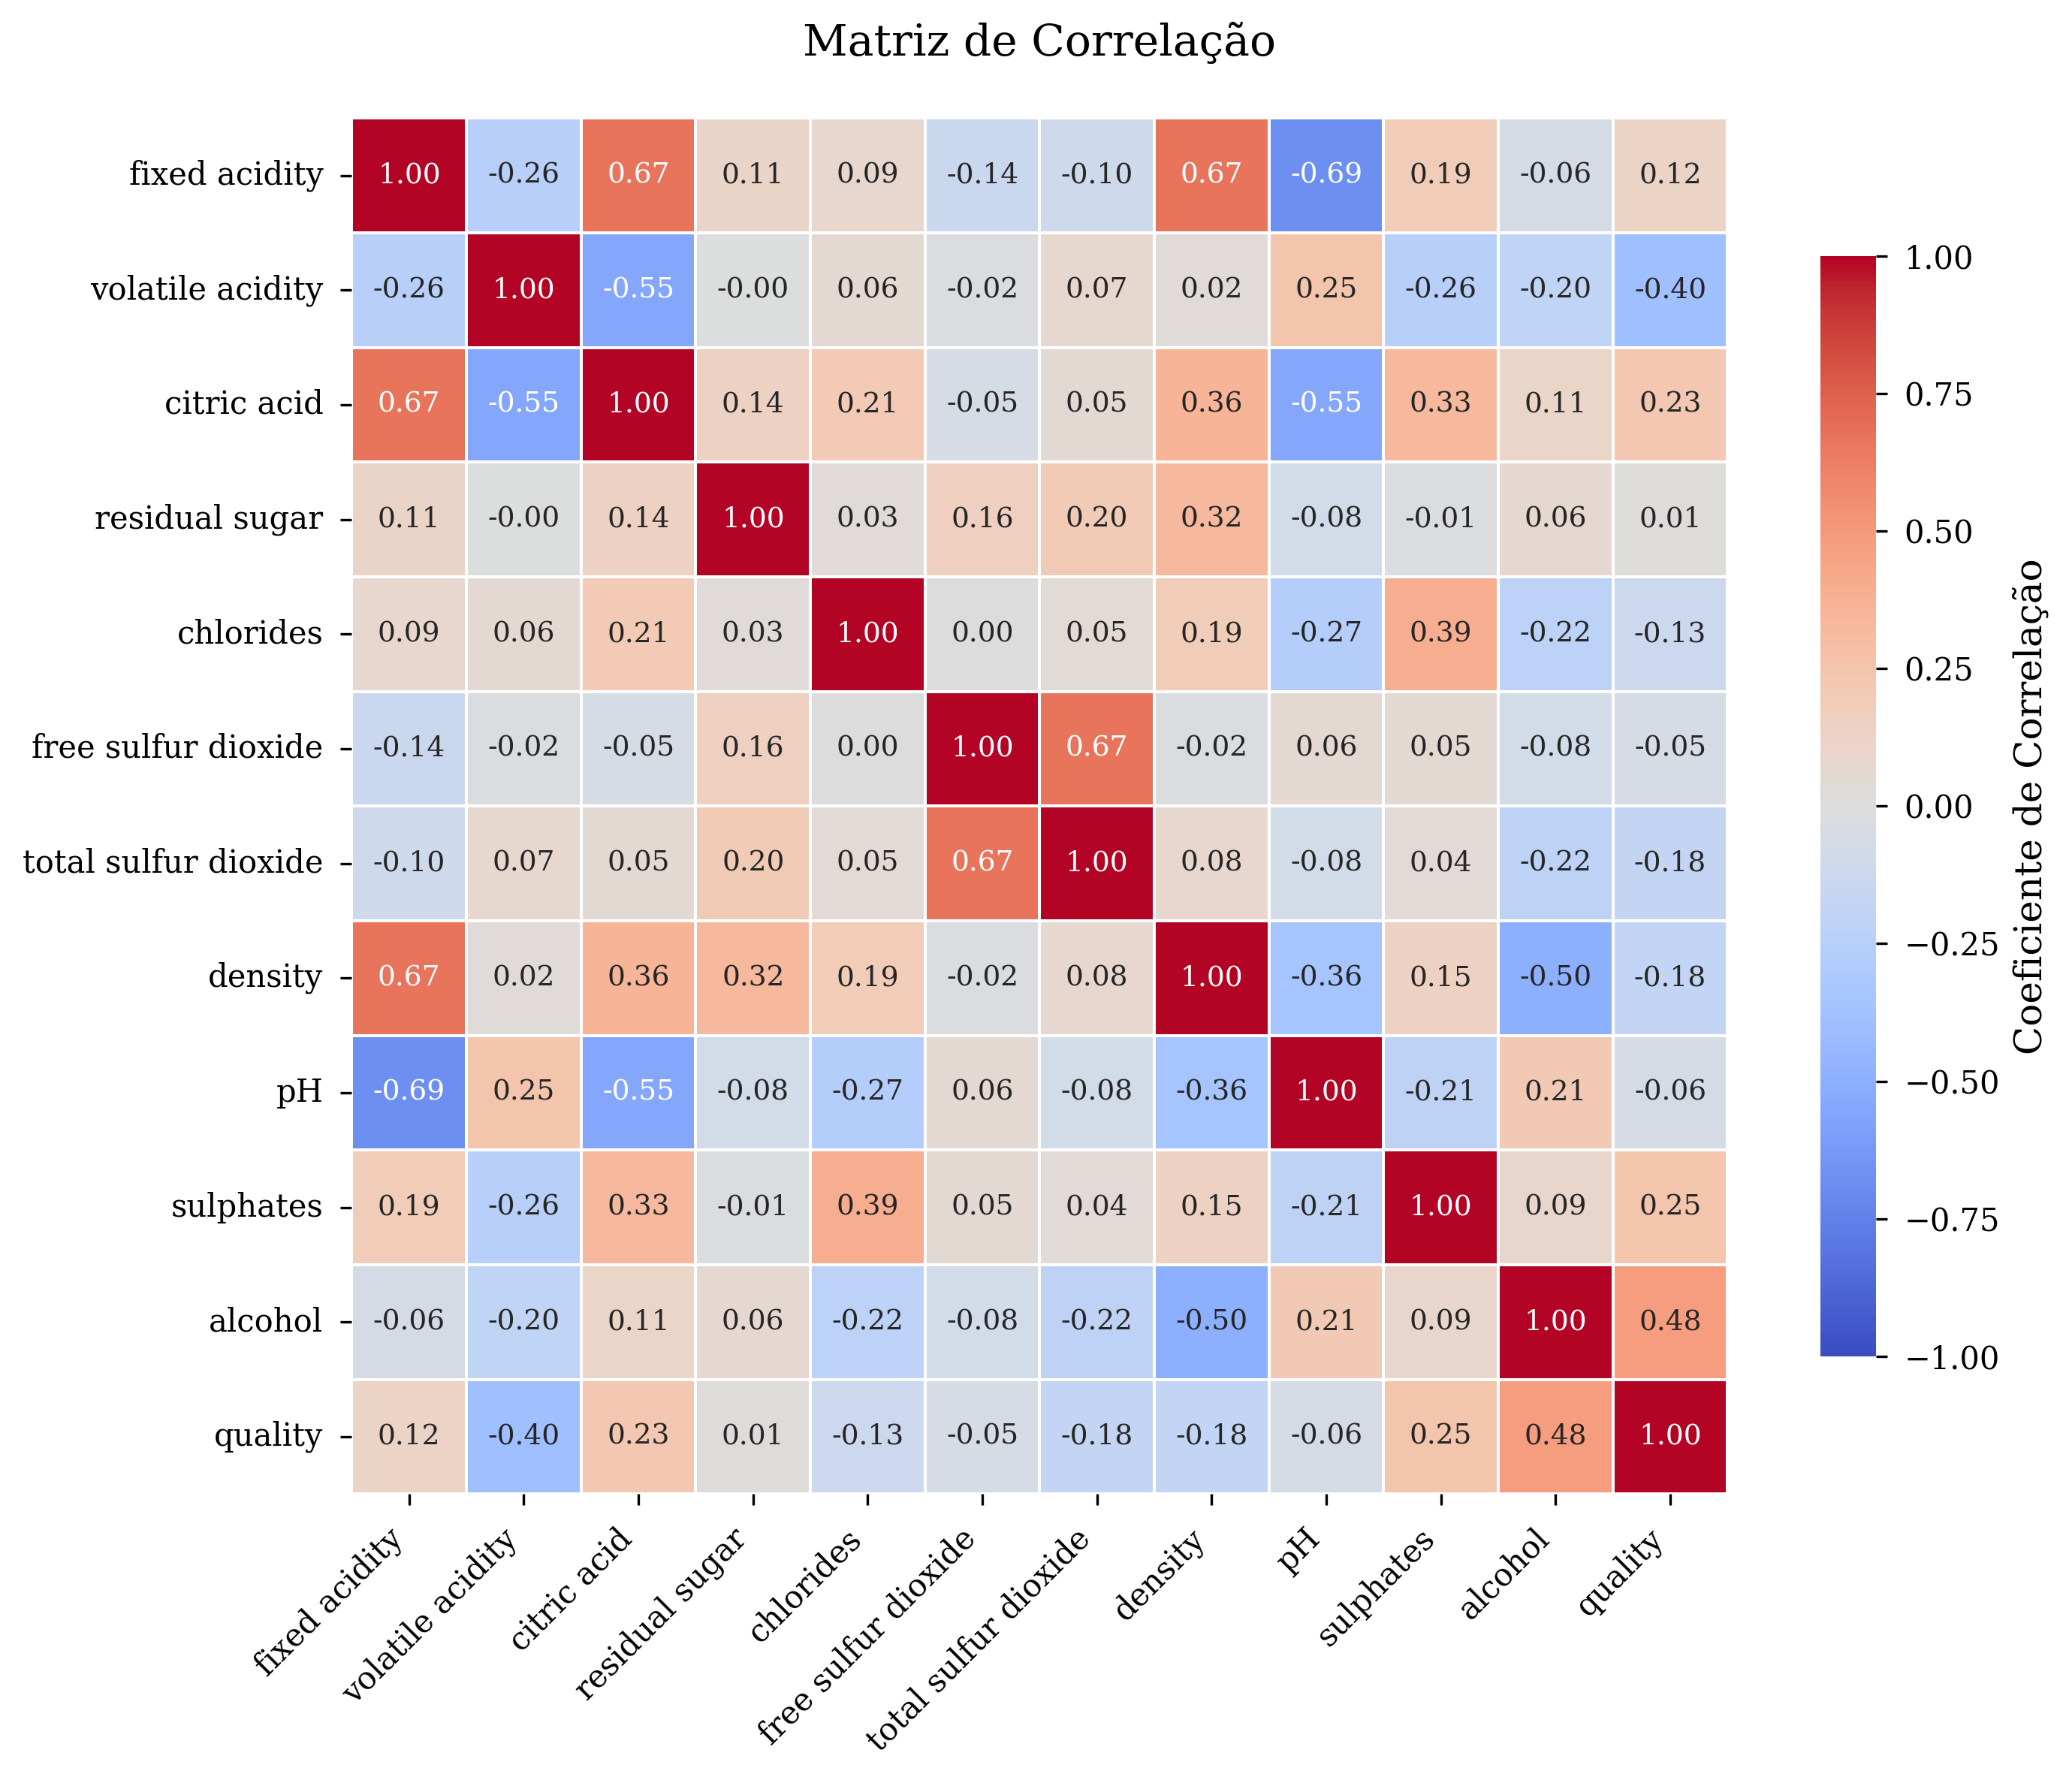

In [ ]:
crr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(crr,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .8, "label": "Coeficiente de Correlação"},
            linewidths=0.5,
            annot_kws={"size": 9},
            vmin=-1, vmax=1,
            center=0)
plt.title('Matriz de Correlação', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df = df.replace({'quality' : {
        8 : 'Good',
        7 : 'Good',
        6 : 'Middle',
        5 : 'Middle',
        4 : 'Bad',
        3 : 'Bad',
        }}
)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4  Middle  
1      9.8  Middle  
2      9.8  Middle  
3      9.8  Middle  
5      9.4  Middle

In [ ]:
X_temp = df.drop(columns='quality')
y = df.quality
y

0       Middle
1       Middle
2       Middle
3       Middle
5       Middle
         ...  
1593    Middle
1594    Middle
1595    Middle
1597    Middle
1598    Middle
Name: quality, Length: 1359, dtype: object

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
x = pd.DataFrame(scaler, columns=X_temp.columns)
x.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        0.328371          0.280464     0.272333        0.111192   
std         0.153716          0.125364     0.195537        0.092624   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.184932     0.090000        0.068493   
50%         0.292035          0.273973     0.260000        0.089041   
75%         0.407080          0.356164     0.430000        0.116438   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.127085             0.209765              0.144261     0.487441   
std       0.082432             0.147145              0.118053     0.137219   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.096828             0.084507              0.056537     0.406021   
50%       0.111853             0.183099              0.113074     0.486784   
75%       0.131886             0.281690              0.201413     0.569016   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol  
count  1359.000000  1359.000000  1359.000000  
mean      0.448651     0.196829     0.312664  
std       0.122076     0.102196     0.166472  
min       0.000000     0.000000     0.000000  
25%       0.370079     0.131737     0.169231  
50%       0.448819     0.173653     0.276923  
75%       0.519685     0.239521     0.415385  
max       1.000000     1.000000     1.000000

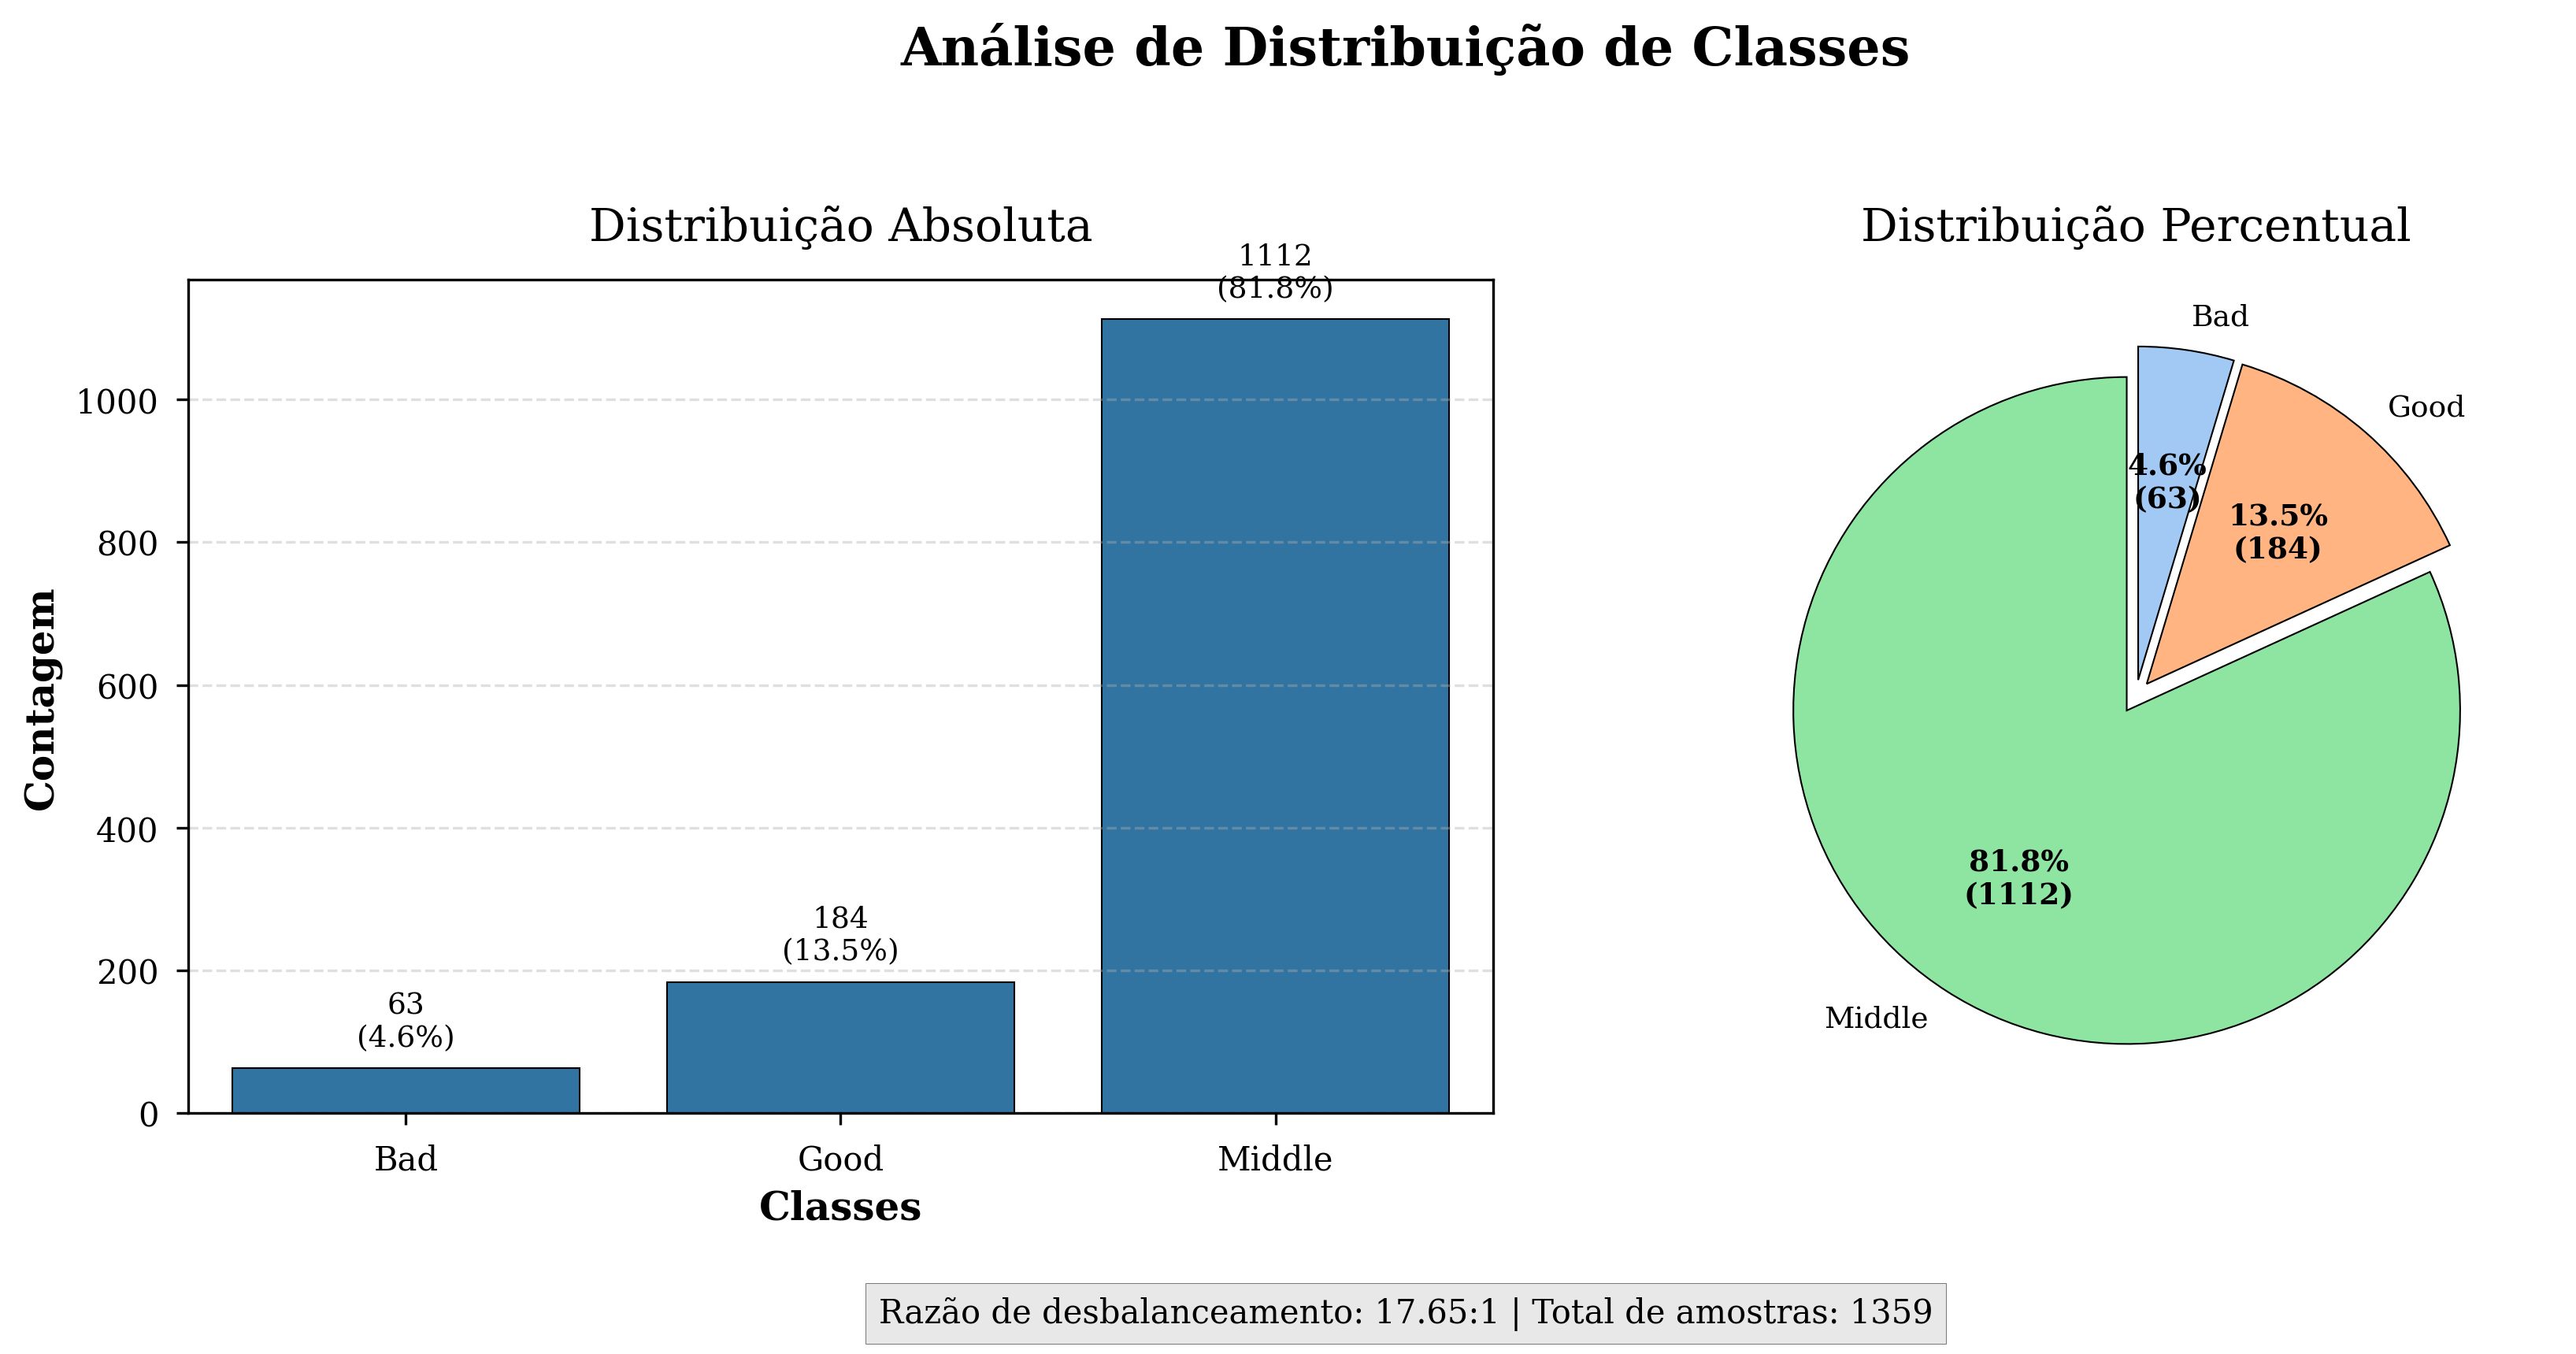

In [ ]:
class_counts = y.value_counts().sort_index()
total_samples = len(y)

fig = plt.figure(figsize=(12, 5))
fig.suptitle('Análise de Distribuição de Classes', y=1.05, fontsize=16, fontweight='bold')

ax1 = plt.subplot(1, 2, 1)
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax1,
                     edgecolor='black', linewidth=0.5)

for i, count in enumerate(class_counts.values):
    barplot.text(i, count + max(class_counts)*0.02, f"{count}\n({count/total_samples:.1%})",
                ha='center', va='bottom', fontsize=9)

ax1.set_title('Distribuição Absoluta', pad=12)
ax1.set_xlabel('Classes', fontweight='bold')
ax1.set_ylabel('Contagem', fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

ax2 = plt.subplot(1, 2, 2)
explode = [0.05] * len(class_counts)
colors = sns.color_palette("pastel")

wedges, texts, autotexts = ax2.pie(
    class_counts.values,
    labels=class_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*total_samples)})',
    startangle=90,
    counterclock=False,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 9}
)

plt.setp(autotexts, size=9, weight='bold')
ax2.set_title('Distribuição Percentual', pad=12)

max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class

fig.text(0.5, -0.05,
        f"Razão de desbalanceamento: {imbalance_ratio:.2f}:1 | Total de amostras: {total_samples}",
        ha='center', fontsize=10, bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout()

plt.show()

## Análise PCA

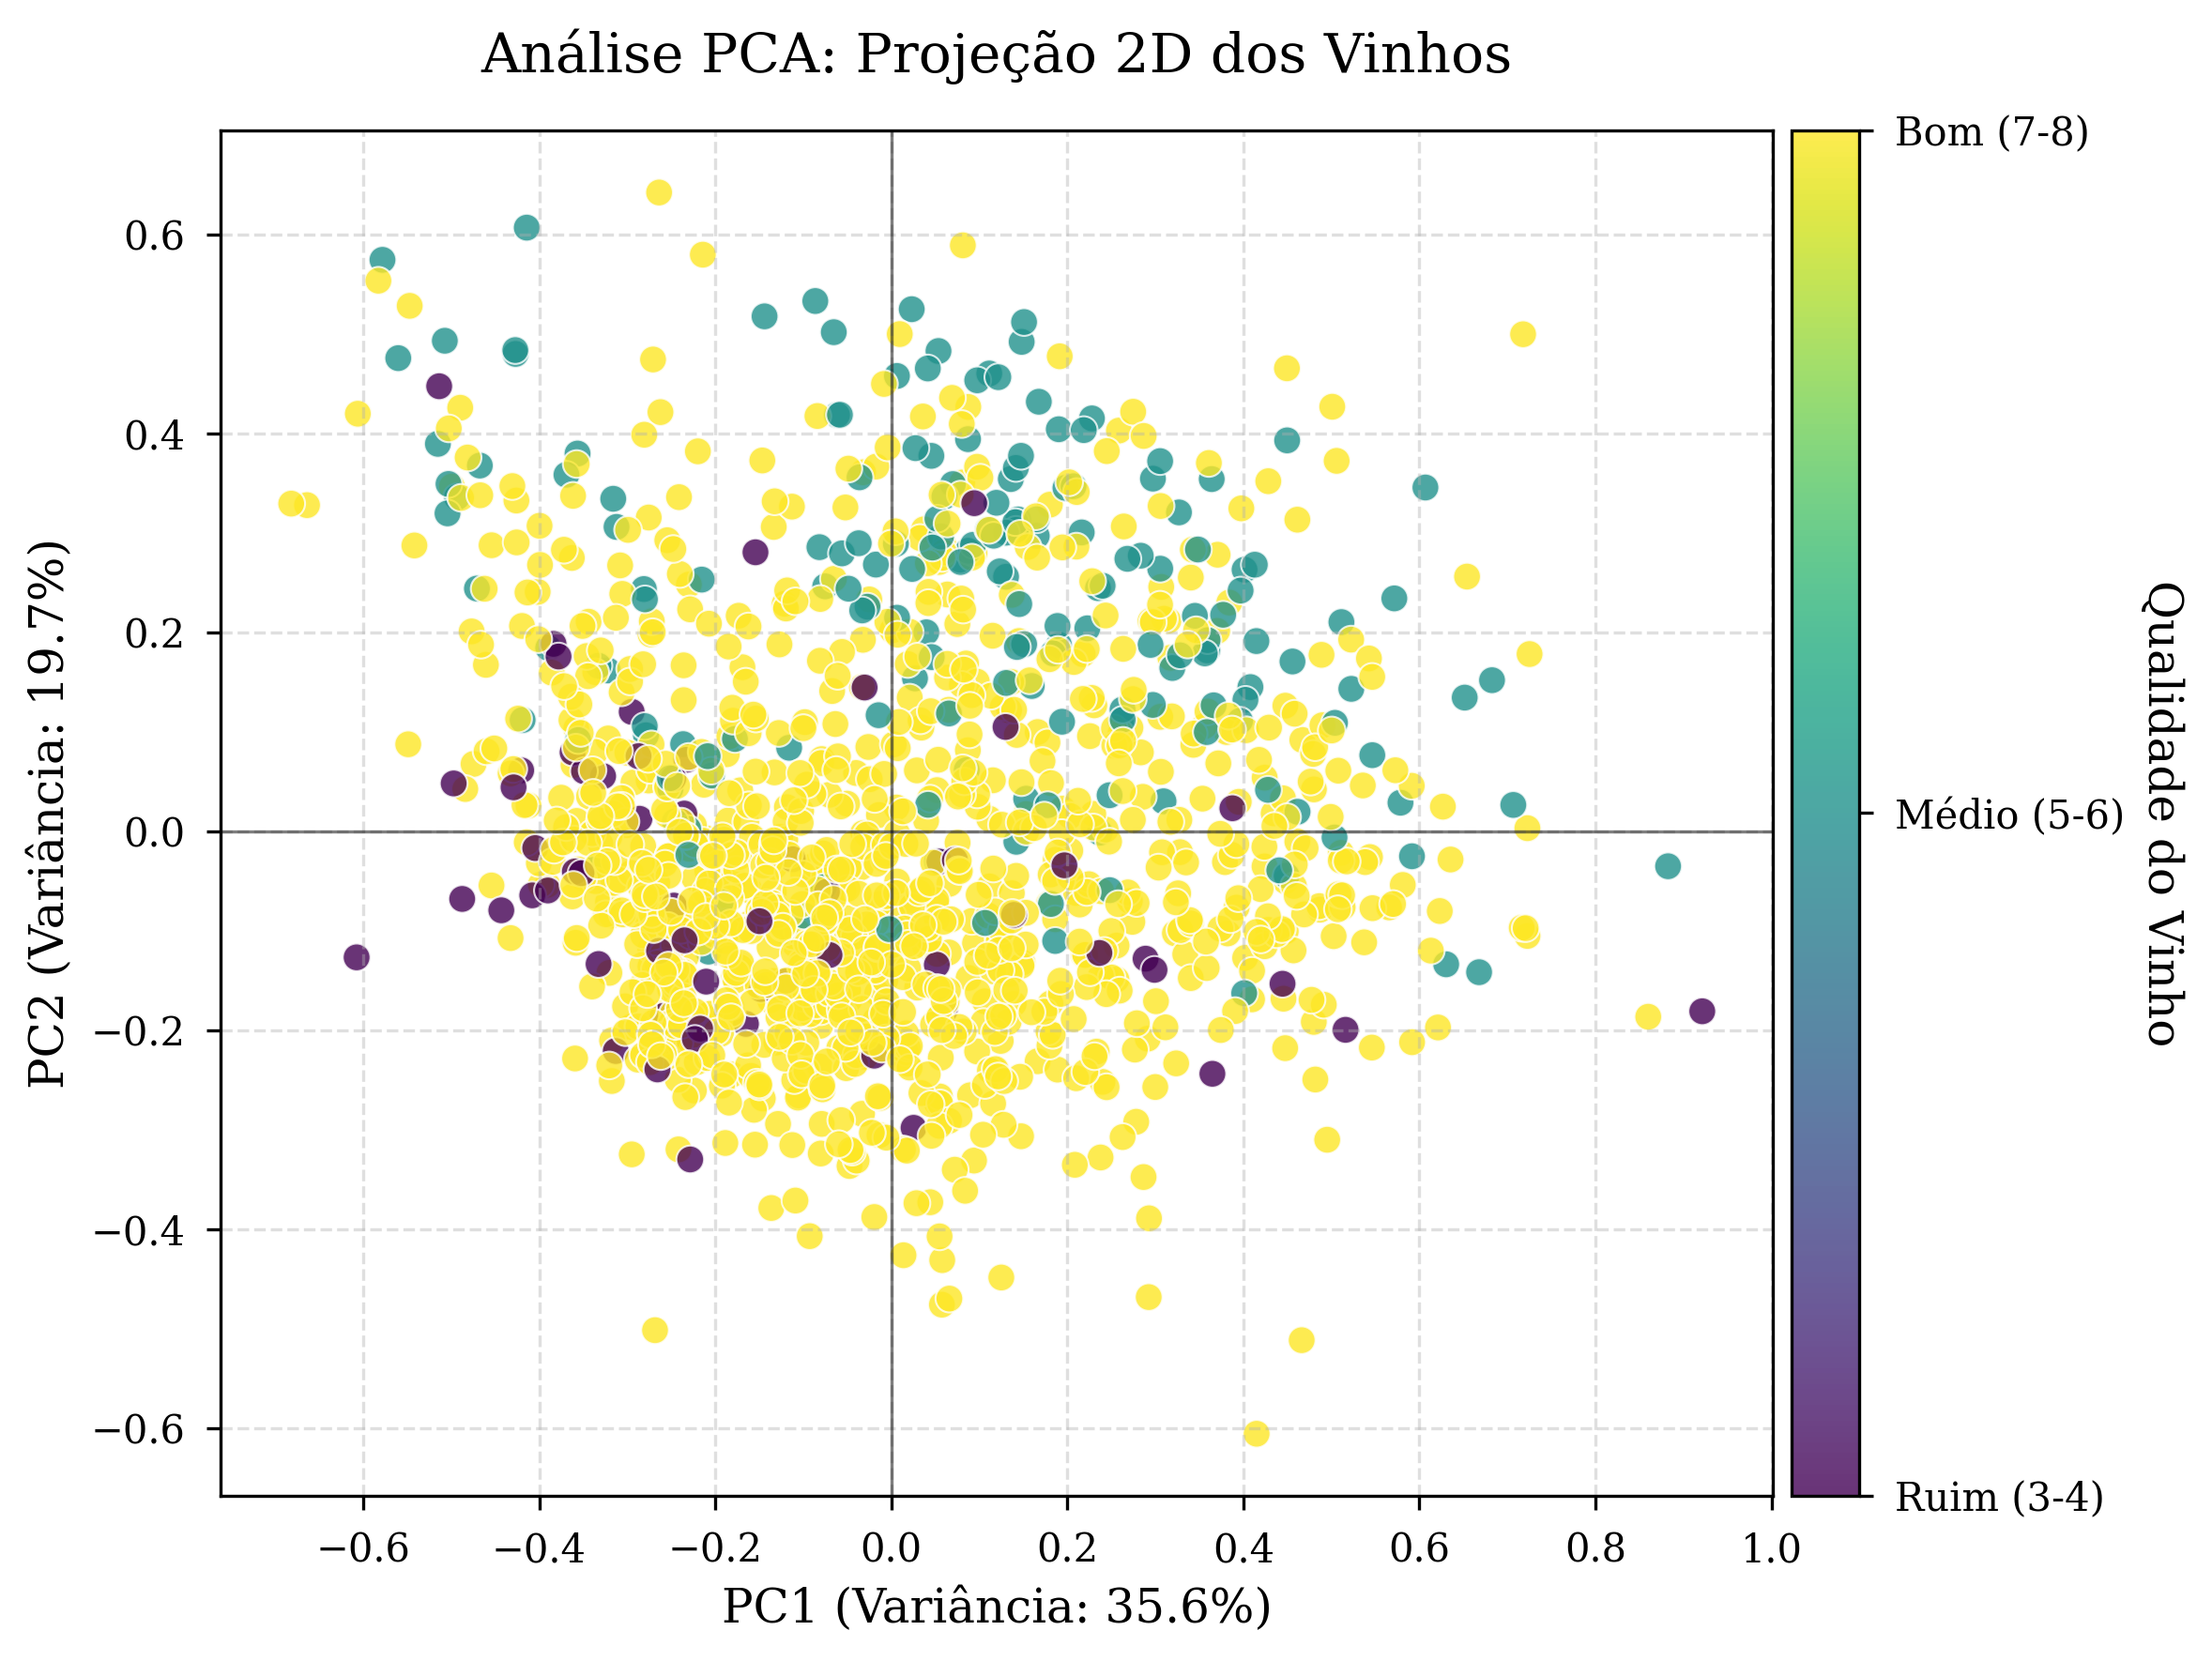

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y.astype('category').cat.codes,
    cmap='viridis',
    alpha=0.8,
    s=50,
    edgecolor='w',
    linewidth=0.5
)

cbar = plt.colorbar(scatter, pad=0.01)
cbar.set_label('Qualidade do Vinho', rotation=270, labelpad=15)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Ruim (3-4)', 'Médio (5-6)', 'Bom (7-8)'])

plt.xlabel(f'PC1 (Variância: {pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 (Variância: {pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Análise PCA: Projeção 2D dos Vinhos', pad=15)

plt.grid(True, linestyle='--', alpha=0.4)
plt.axhline(0, color='black', linewidth=0.8, alpha=0.5)
plt.axvline(0, color='black', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)

# Modelos

In [ ]:
test_f1_scores = {}
test_scores = {}
best_estimators = {}
cv_distributions = {}
cv_times = {}

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'liblinear'],
    'penalty': ['l2'],
    'class_weight': ['balanced']
}

lr = LogisticRegression(max_iter=1000)
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10, scoring='f1_macro')
lr_cv.fit(x_train, y_train)

print('Melhores parâmetros:', lr_cv.best_params_)
print('Melhor F1 macro score (validação cruzada):', lr_cv.best_score_)

best_lr = lr_cv.best_estimator_
y_pred = best_lr.predict(x_test)

test_f1_scores['LogisticRegression'] = f1_score(y_test, y_pred, average='macro')
test_scores['LogisticRegression'] = best_lr.score(x_test, y_test)
print('Acurácia no conjunto de teste:', test_scores['LogisticRegression'])

best_estimators['LogisticRegression'] = best_lr

Melhores parâmetros: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Melhor F1 macro score (validação cruzada): 0.5395106354679753
Acurácia no conjunto de teste: 0.7676470588235295


## RandomForestClassifier

In [ ]:
parameters = {
    'n_estimators': [50, 150, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=10, scoring='f1_macro').fit(x_train, y_train)

print('Melhores parâmetros:', rf_cv.best_params_)
print('Melhor F1 macro score (validação cruzada):', rf_cv.best_score_)

best_rf = rf_cv.best_estimator_
y_pred = best_rf.predict(x_test)

test_f1_scores['RandomForest'] = f1_score(y_test, y_pred, average='macro')
test_scores['RandomForest'] = best_rf.score(x_test, y_test)
print('Acurácia no conjunto de teste:', test_scores['RandomForest'])

best_estimators['RandomForest'] = best_rf

Melhores parâmetros: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Melhor F1 macro score (validação cruzada): 0.4795691138934702
Acurácia no conjunto de teste: 0.8147058823529412


## SVM (SVC)

In [ ]:
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, scoring='f1_macro').fit(x_train, y_train)

print('Melhores parâmetros:', svc_cv.best_params_)
print('Melhor F1 macro score (validação cruzada):', svc_cv.best_score_)

best_svc = svc_cv.best_estimator_
y_pred = best_svc.predict(x_test)

test_f1_scores['SVC'] = f1_score(y_test, y_pred, average='macro')
test_scores['SVC'] = best_svc.score(x_test, y_test)
print('Acurácia no conjunto de teste:', test_scores['SVC'])

best_estimators['SVC'] = best_svc

Melhores parâmetros: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Melhor F1 macro score (validação cruzada): 0.5430112855901873
Acurácia no conjunto de teste: 0.6764705882352942


## DecisionTreeClassifier

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(4, 21, 2)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_cv = GridSearchCV(estimator=dt, param_grid=parameters, cv=10, scoring='f1_macro').fit(x_train, y_train)

print('Melhores parâmetros:', dt_cv.best_params_)
print('Melhor F1 macro score (validação cruzada):', dt_cv.best_score_)

best_dt = dt_cv.best_estimator_
y_pred = best_dt.predict(x_test)

test_f1_scores['DecisionTreeClassifier'] = f1_score(y_test, y_pred, average='macro')
test_scores['DecisionTreeClassifier'] = best_dt.score(x_test, y_test)
print('Acurácia no conjunto de teste:', test_scores['DecisionTreeClassifier'])

best_estimators['DecisionTreeClassifier'] = best_dt

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Melhor F1 macro score (validação cruzada): 0.5061192262785589
Acurácia no conjunto de teste: 0.6911764705882353


## KNeighborsClassifier

In [ ]:
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=10, scoring='f1_macro').fit(x_train, y_train)

print('Melhores parâmetros:', knn_cv.best_params_)
print('Melhor F1 macro score (validação cruzada):', knn_cv.best_score_)

best_knn = knn_cv.best_estimator_
y_pred = best_knn.predict(x_test)

test_f1_scores['KNeighborsClassifier'] = f1_score(y_test, y_pred, average='macro')
test_scores['KNeighborsClassifier'] = best_knn.score(x_test, y_test)
print('Acurácia no conjunto de teste:', test_scores['KNeighborsClassifier'])

best_estimators['KNeighborsClassifier'] = best_knn

Melhores parâmetros: {'n_neighbors': np.int64(3), 'p': 2, 'weights': 'distance'}
Melhor F1 macro score (validação cruzada): 0.5418819733922391
Acurácia no conjunto de teste: 0.8088235294117647


## Rede Neural

In [ ]:
parameters = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation':  ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}

warnings.filterwarnings('ignore', category=ConvergenceWarning)

mlp = MLPClassifier(max_iter=500)
mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=10, scoring='f1_macro').fit(x_train, y_train)

print('Melhores parâmetros:', mlp_cv.best_params_)
print('Melhor F1 macro score (validação cruzada):', mlp_cv.best_score_)

best_mlp = mlp_cv.best_estimator_
y_pred = best_mlp.predict(x_test)

test_f1_scores['MLPClassifier'] = f1_score(y_test, y_pred, average='macro')
test_scores['MLPClassifier'] = best_mlp.score(x_test, y_test)
print('Acurácia no conjunto de teste:', test_scores['MLPClassifier'])

best_estimators['MLPClassifier'] = best_mlp

Melhores parâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Melhor F1 macro score (validação cruzada): 0.4782741215170712
Acurácia no conjunto de teste: 0.8029411764705883


# Análise de resultados

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=30, random_state=42)

In [ ]:
for name, est in best_estimators.items():
    start_time = time.time()
    scores = cross_validate(
        est, x, y,
        cv=cv,
        scoring=['f1_macro', 'accuracy'],
        n_jobs=-1
    )
    cv_time = time.time() - start_time
    cv_distributions[name] = {
        'f1_macro': scores['test_f1_macro'],
        'accuracy': scores['test_accuracy']
    }
    cv_times[name] = cv_time
    print(f"{name}:")
    print(f"  F1_macro: mean={scores['test_f1_macro'].mean():.4f} ± {scores['test_f1_macro'].std():.4f}")
    print(f"  Accuracy: mean={scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
    print(f"  Time: {str(timedelta(seconds=cv_time))}")

LogisticRegression:
  F1_macro: mean=0.5286 ± 0.0434
  Accuracy: mean=0.7823 ± 0.0229
  Time: 0:00:05.678869
RandomForest:
  F1_macro: mean=0.4618 ± 0.0374
  Accuracy: mean=0.8335 ± 0.0146
  Time: 0:00:26.988980
SVC:
  F1_macro: mean=0.5207 ± 0.0303
  Accuracy: mean=0.6848 ± 0.0281
  Time: 0:00:11.439380
DecisionTreeClassifier:
  F1_macro: mean=0.4712 ± 0.0353
  Accuracy: mean=0.6835 ± 0.0304
  Time: 0:00:02.681160
KNeighborsClassifier:
  F1_macro: mean=0.5200 ± 0.0492
  Accuracy: mean=0.8227 ± 0.0165
  Time: 0:00:01.979496
MLPClassifier:
  F1_macro: mean=0.4862 ± 0.0438
  Accuracy: mean=0.8328 ± 0.0165
  Time: 0:04:51.173227


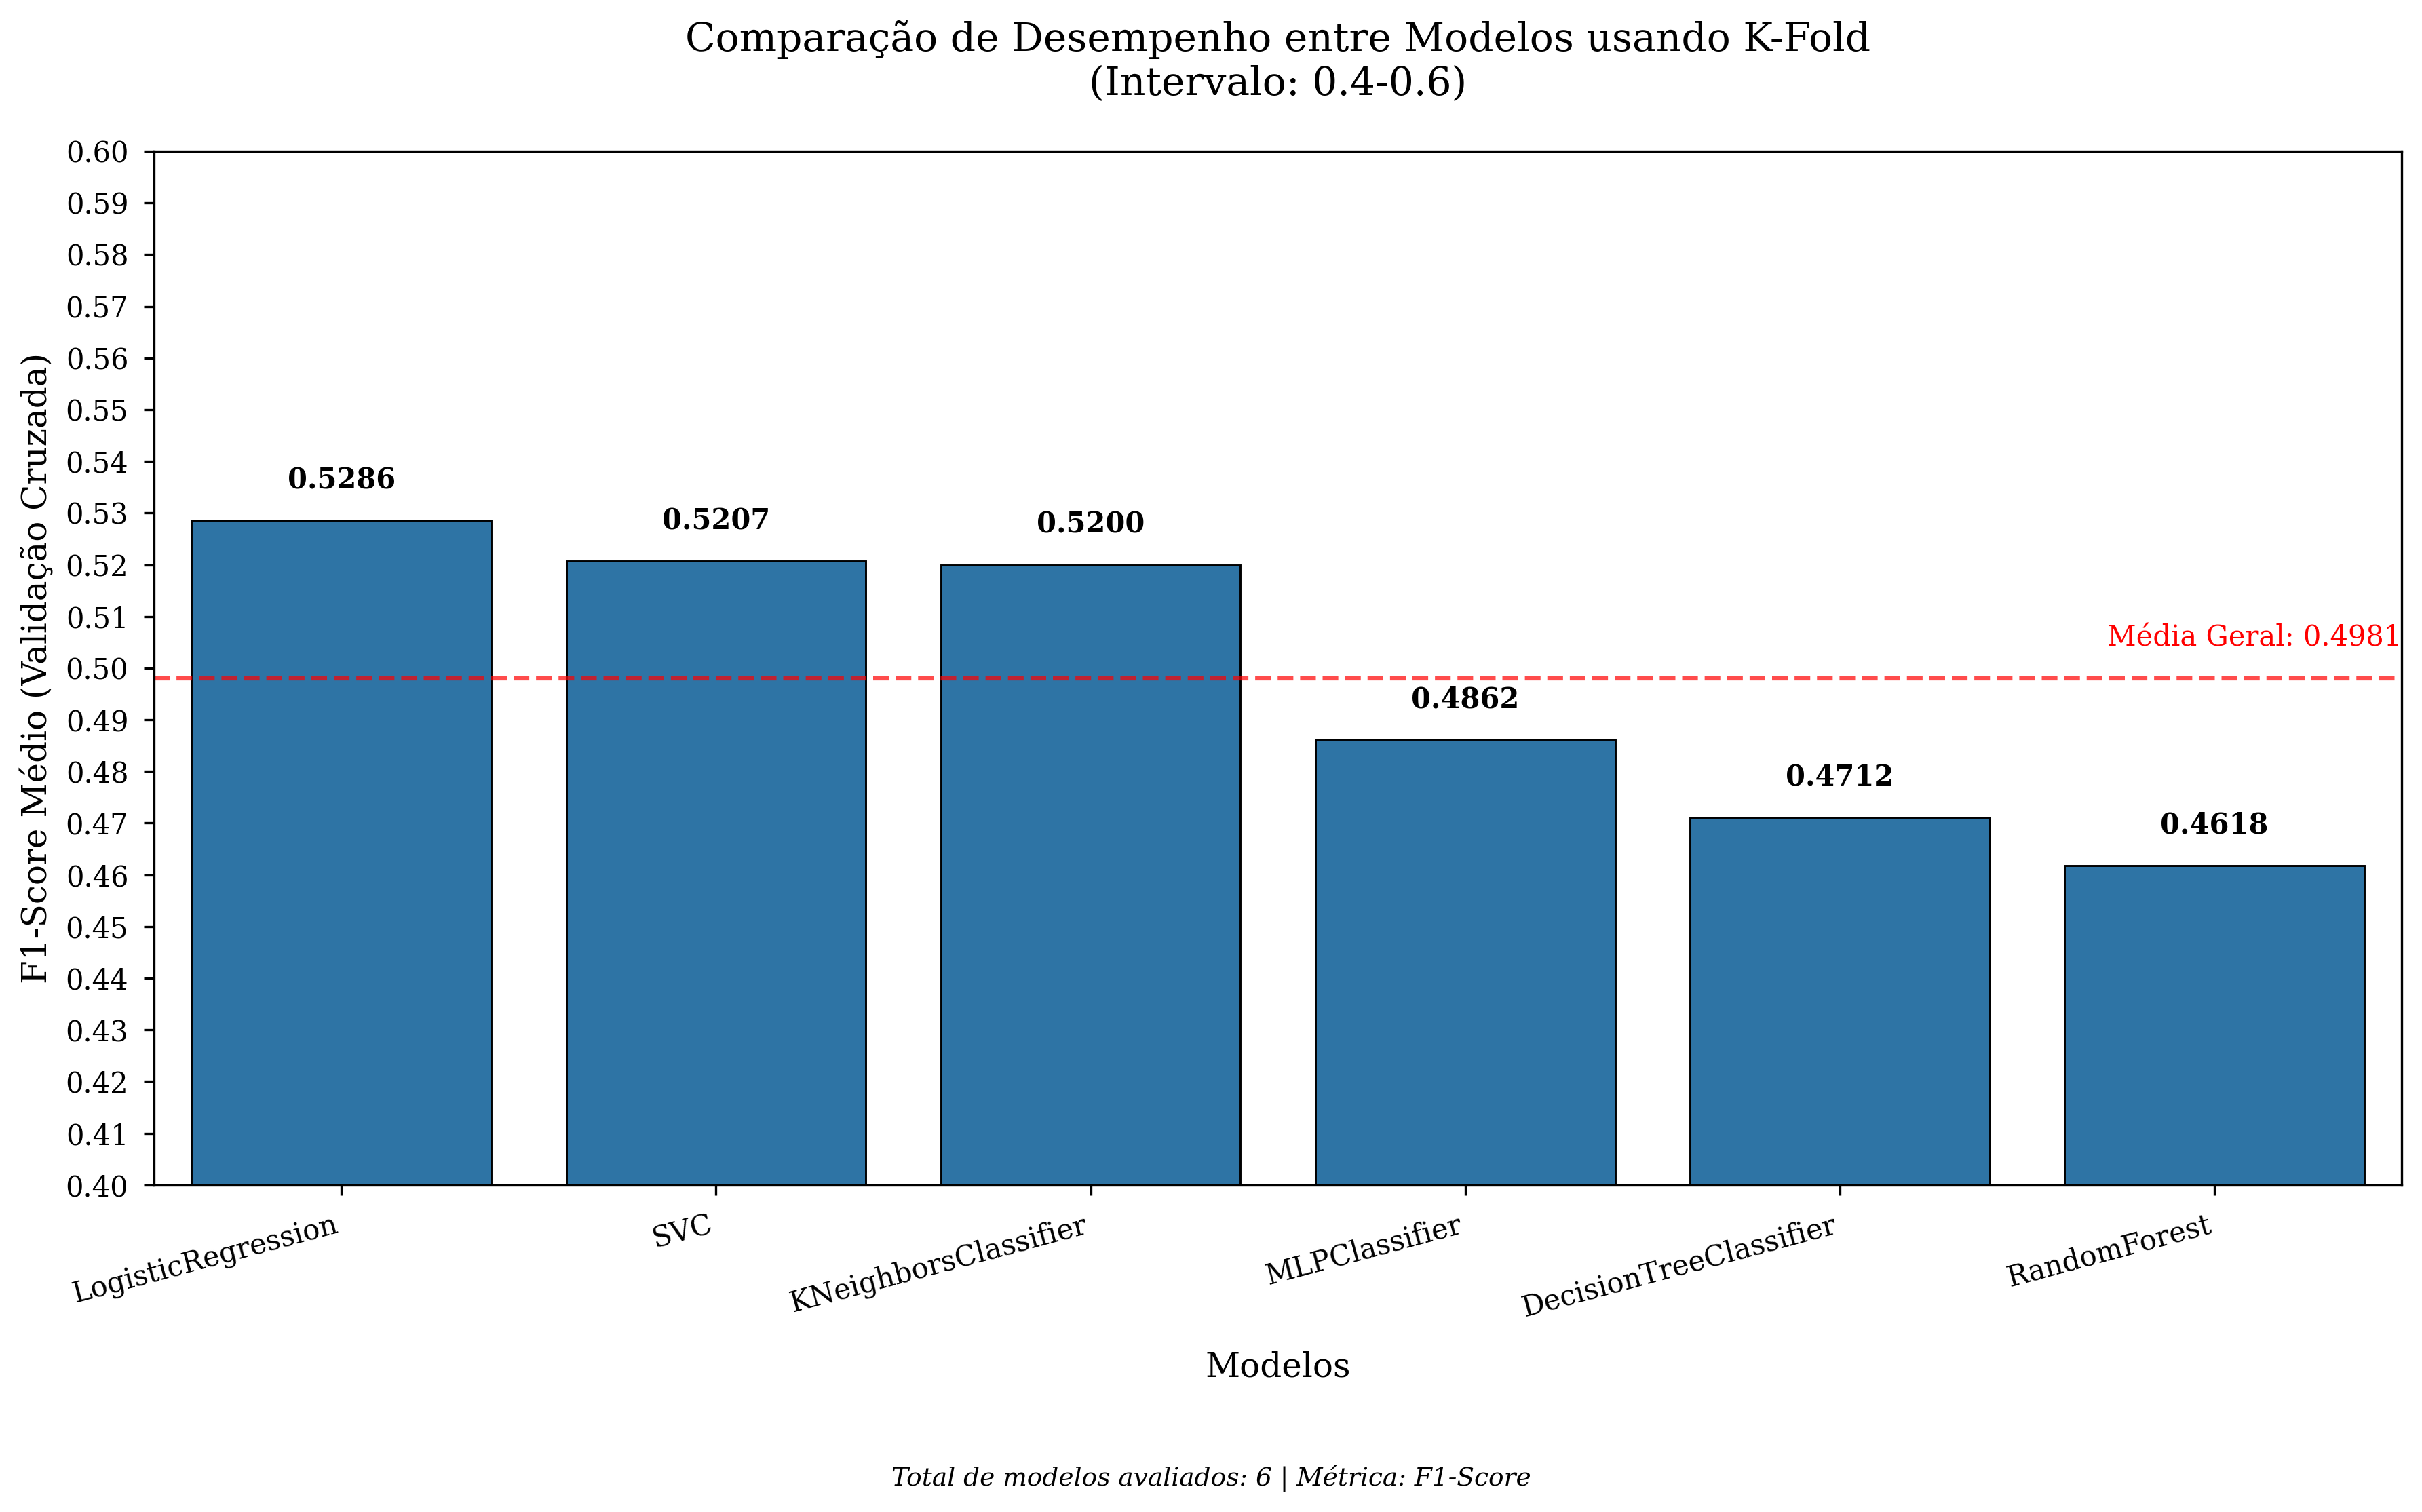

In [ ]:
palette = sns.light_palette("navy", as_cmap=True)

cv_means = {name: values['f1_macro'].mean() for name, values in cv_distributions.items()}
sorted_models = sorted(cv_means.items(), key=lambda x: x[1], reverse=True)
model_names = [m[0] for m in sorted_models]
mean_scores = [m[1] for m in sorted_models]

fig, ax = plt.subplots(figsize=(12, 7))

barplot = sns.barplot(x=model_names, y=mean_scores,
					saturation=0.8,
					edgecolor='black',
					linewidth=0.7,
					ax=ax)

ax.set_ylim(0.4, 0.6)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

for i, (name, score) in enumerate(sorted_models):
    ax.text(i, score + 0.005, f'{score:.4f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold')

ax.set_xlabel('Modelos', fontsize=12, labelpad=10)
ax.set_ylabel('F1-Score Médio (Validação Cruzada)', fontsize=12)
ax.set_title('Comparação de Desempenho entre Modelos usando K-Fold\n(Intervalo: 0.4-0.6)',
			fontsize=14, pad=20)

overall_mean = np.mean(mean_scores)
ax.axhline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(len(model_names)-0.5, overall_mean+0.005, f'Média Geral: {overall_mean:.4f}',
        color='red', ha='right', va='bottom')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()

fig.text(0.5, -0.05, f'Total de modelos avaliados: {len(model_names)} | Métrica: F1-Score', ha='center', fontsize=9, style='italic')

plt.show()

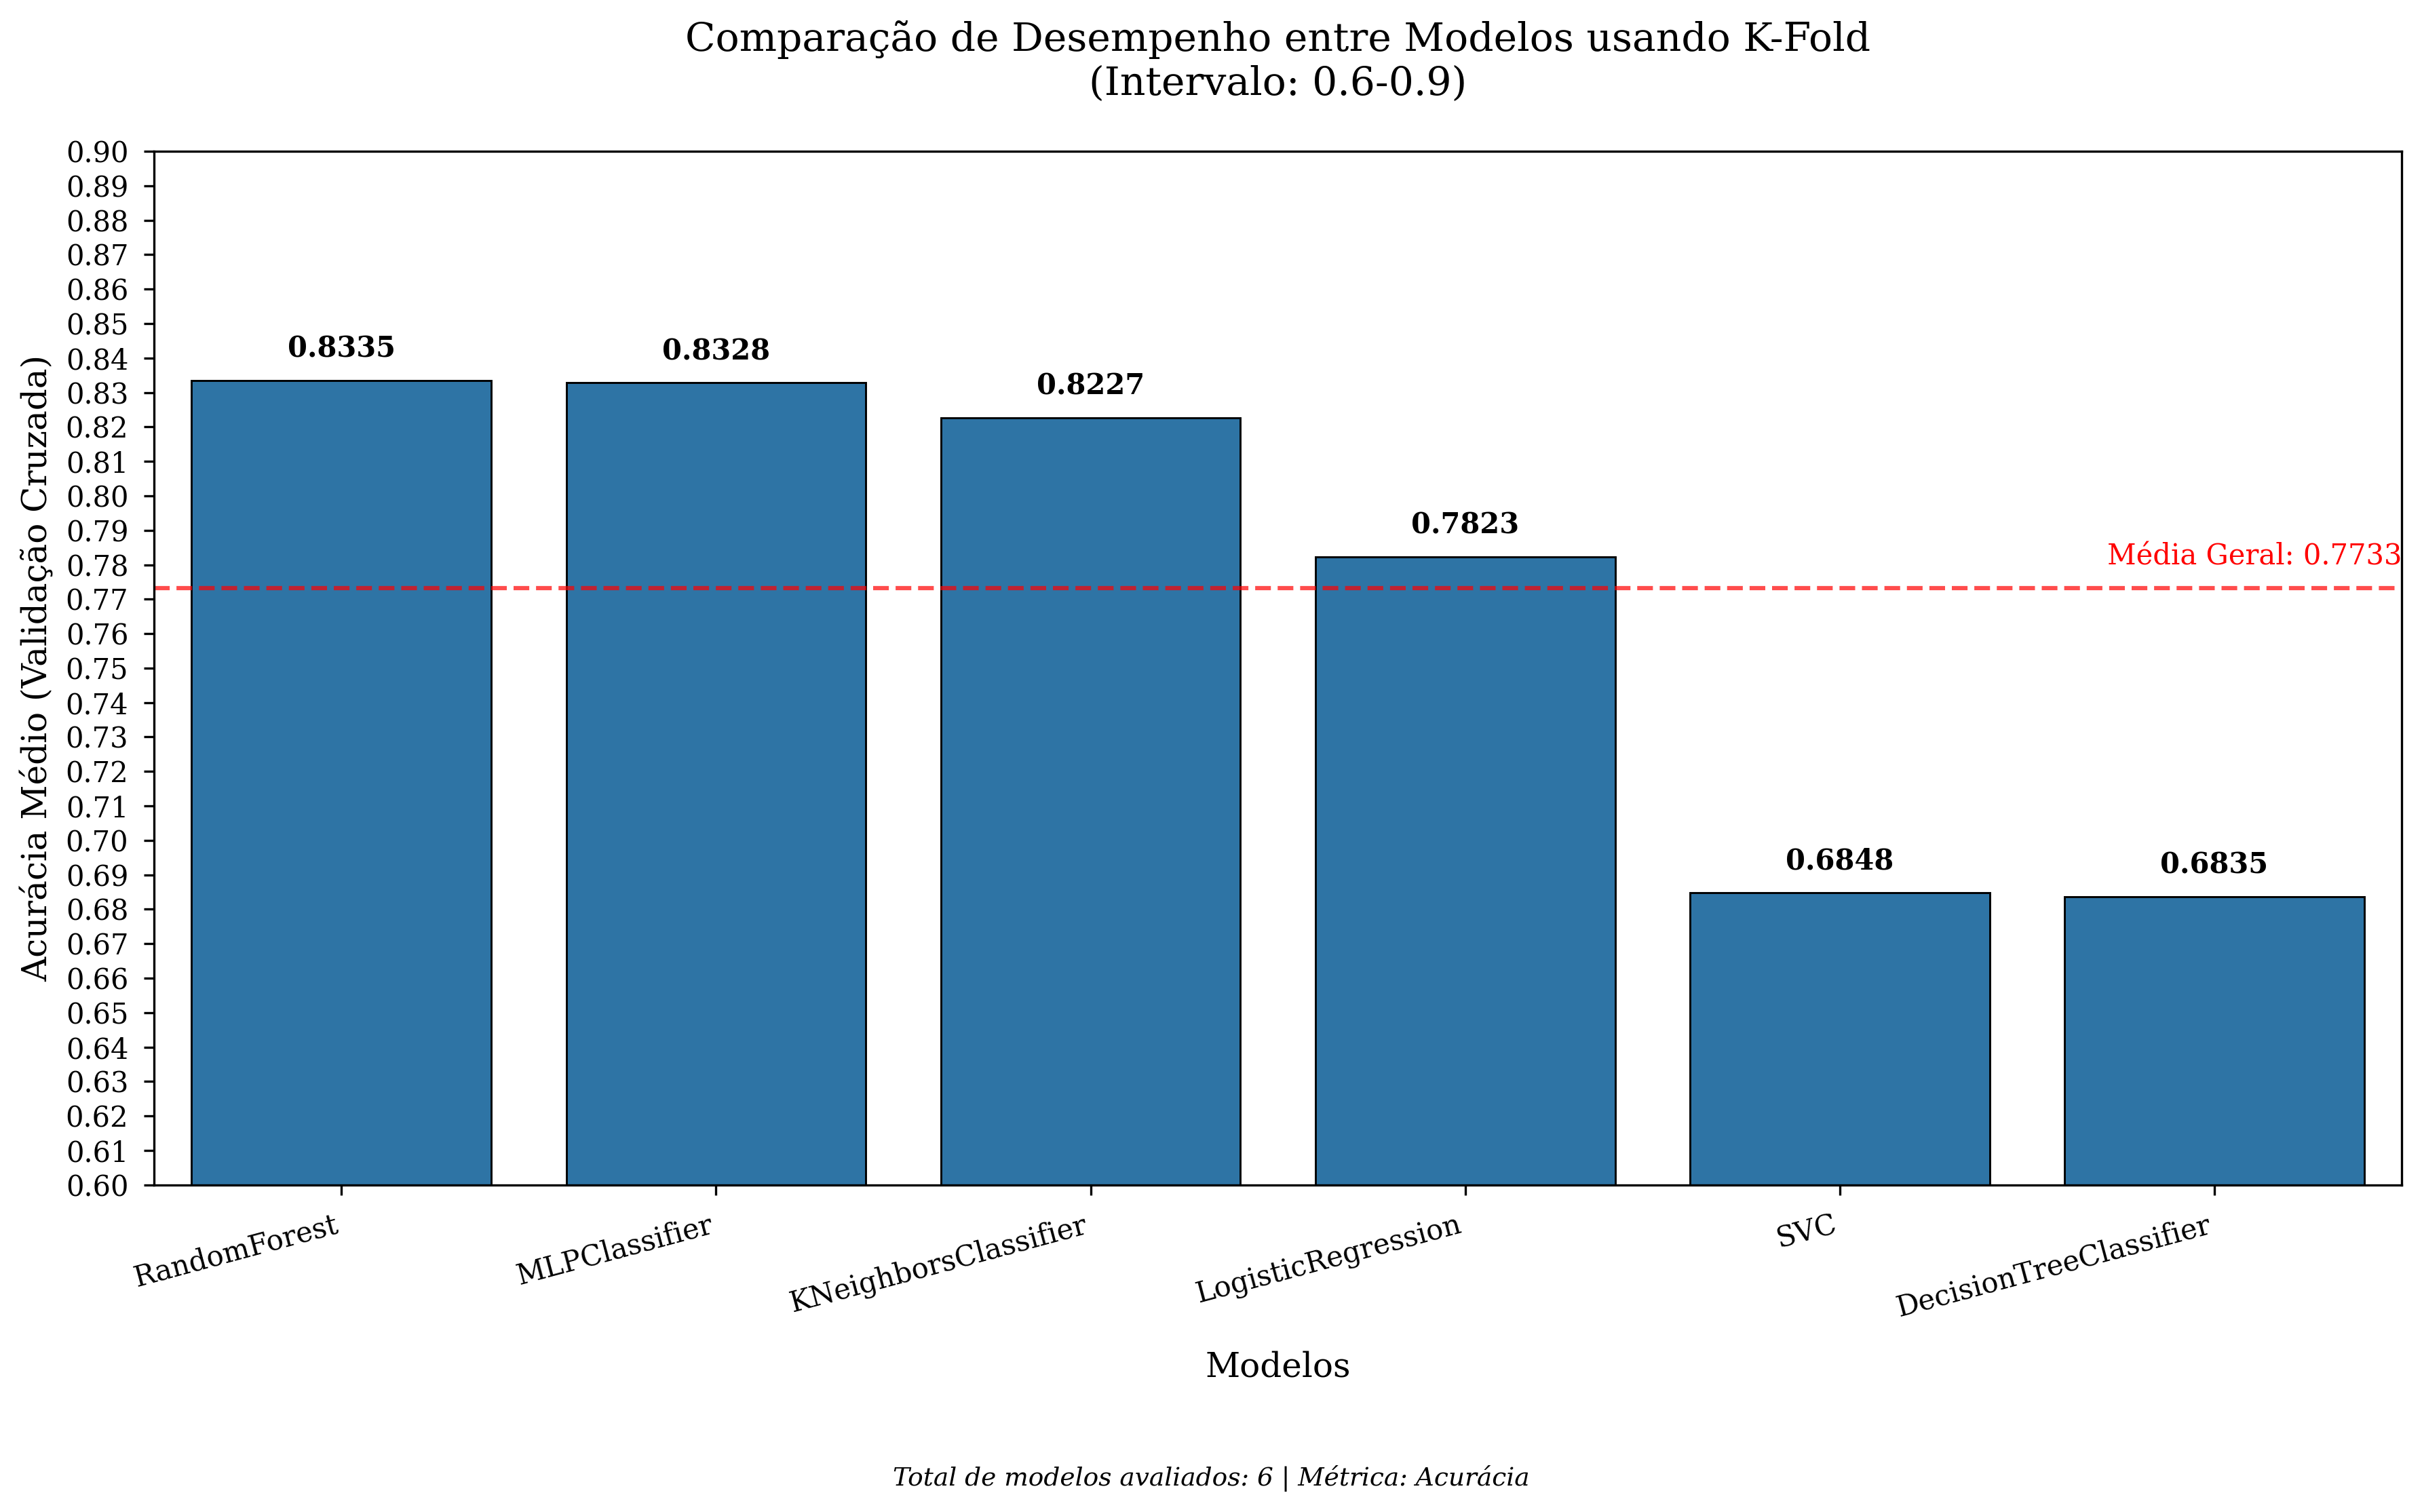

In [ ]:
palette = sns.light_palette("navy", as_cmap=True)

cv_means = {name: values['accuracy'].mean() for name, values in cv_distributions.items()}
sorted_models = sorted(cv_means.items(), key=lambda x: x[1], reverse=True)
model_names = [m[0] for m in sorted_models]
mean_scores = [m[1] for m in sorted_models]

fig, ax = plt.subplots(figsize=(12, 7))

barplot = sns.barplot(x=model_names, y=mean_scores,
					saturation=0.8,
					edgecolor='black',
					linewidth=0.7,
					ax=ax)

ax.set_ylim(0.6, 0.9)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

for i, (name, score) in enumerate(sorted_models):
    ax.text(i, score + 0.005, f'{score:.4f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold')

ax.set_xlabel('Modelos', fontsize=12, labelpad=10)
ax.set_ylabel('Acurácia Médio (Validação Cruzada)', fontsize=12)
ax.set_title('Comparação de Desempenho entre Modelos usando K-Fold\n(Intervalo: 0.6-0.9)',
			fontsize=14, pad=20)

overall_mean = np.mean(mean_scores)
ax.axhline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(len(model_names)-0.5, overall_mean+0.005, f'Média Geral: {overall_mean:.4f}',
        color='red', ha='right', va='bottom')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()

fig.text(0.5, -0.05, f'Total de modelos avaliados: {len(model_names)} | Métrica: Acurácia', ha='center', fontsize=9, style='italic')

plt.show()

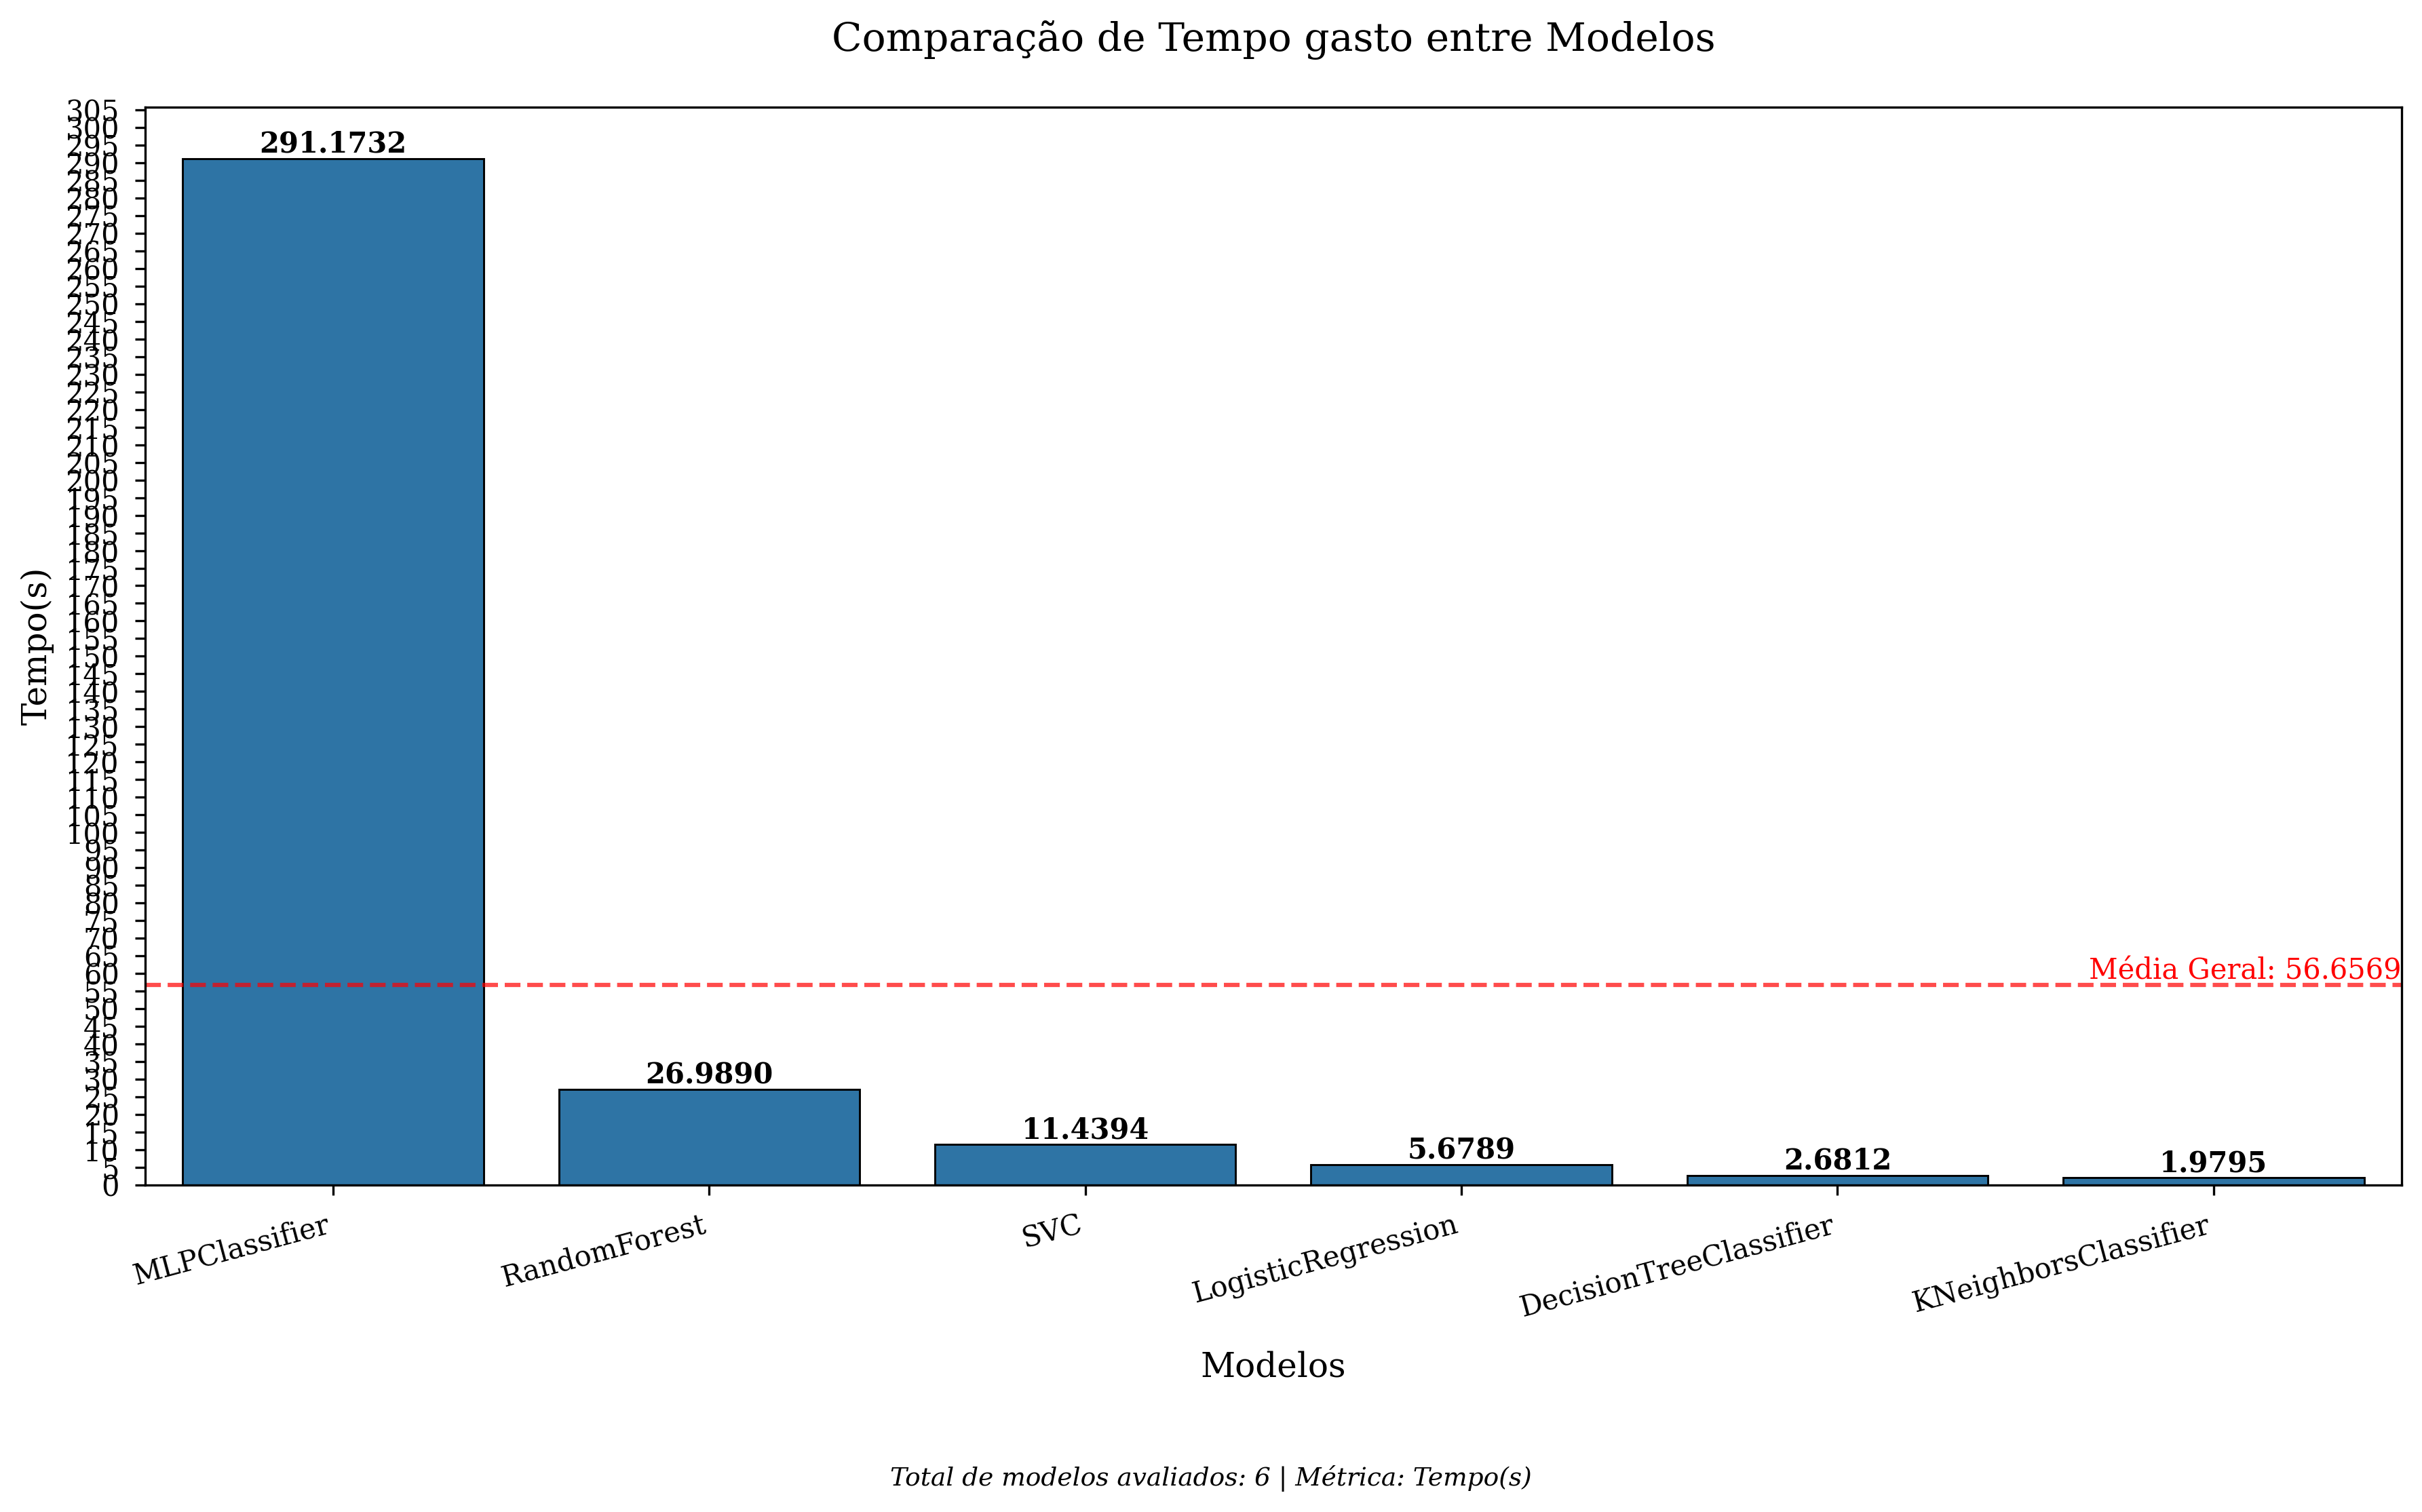

In [ ]:
alette = sns.light_palette("navy", as_cmap=True)

sorted_models = sorted(cv_times.items(), key=lambda x: x[1], reverse=True)
model_names = [m[0] for m in sorted_models]
mean_scores = [m[1] for m in sorted_models]

fig, ax = plt.subplots(figsize=(12, 7))

barplot = sns.barplot(x=model_names, y=mean_scores,
					saturation=0.8,
					edgecolor='black',
					linewidth=0.7,
					ax=ax)

ax.yaxis.set_major_locator(plt.MultipleLocator(5))

for i, (name, score) in enumerate(sorted_models):
    ax.text(i, score + 0.005, f'{score:.4f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold')

ax.set_xlabel('Modelos', fontsize=12, labelpad=10)
ax.set_ylabel('Tempo(s)', fontsize=12)
ax.set_title('Comparação de Tempo gasto entre Modelos',
			fontsize=14, pad=20)

overall_mean = np.mean(mean_scores)
ax.axhline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(len(model_names)-0.5, overall_mean+0.005, f'Média Geral: {overall_mean:.4f}',
        color='red', ha='right', va='bottom')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()

fig.text(0.5, -0.05, f'Total de modelos avaliados: {len(model_names)} | Métrica: Tempo(s)', ha='center', fontsize=9, style='italic')

plt.show()

In [ ]:
palette = sns.light_palette("navy", as_cmap=True)

sorted_models = sorted(test_f1_scores.items(), key=lambda x: x[1], reverse=True)
model_names = [m[0] for m in sorted_models]
mean_scores = [m[1] for m in sorted_models]

fig, ax = plt.subplots(figsize=(12, 7))

barplot = sns.barplot(x=model_names, y=mean_scores,
					saturation=0.8,
					edgecolor='black',
					linewidth=0.7,
					ax=ax)

ax.set_ylim(0.4, 0.6)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

for i, (name, score) in enumerate(sorted_models):
    ax.text(i, score + 0.005, f'{score:.4f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold')

ax.set_xlabel('Modelos', fontsize=12, labelpad=10)
ax.set_ylabel('F1-Score (Conjunto Teste)', fontsize=12)
ax.set_title('Comparação de Desempenho entre Modelos usando Conjunto de teste\n(Intervalo: 0.4-0.6)',
			fontsize=14, pad=20)

overall_mean = np.mean(mean_scores)
ax.axhline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(len(model_names)-0.5, overall_mean+0.005, f'Média Geral: {overall_mean:.4f}',
        color='red', ha='right', va='bottom')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()

fig.text(0.5, -0.05, f'Total de modelos avaliados: {len(model_names)} | Métrica: F1-Score', ha='center', fontsize=9, style='italic')

plt.show()

In [ ]:
palette = sns.light_palette("navy", as_cmap=True)

sorted_models = sorted(test_scores.items(), key=lambda x: x[1], reverse=True)
model_names = [m[0] for m in sorted_models]
mean_scores = [m[1] for m in sorted_models]

fig, ax = plt.subplots(figsize=(12, 7))

barplot = sns.barplot(x=model_names, y=mean_scores,
					saturation=0.8,
					edgecolor='black',
					linewidth=0.7,
					ax=ax)

ax.set_ylim(0.6, 0.9)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

for i, (name, score) in enumerate(sorted_models):
    ax.text(i, score + 0.005, f'{score:.4f}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold')

ax.set_xlabel('Modelos', fontsize=12, labelpad=10)
ax.set_ylabel('Acurácia (Conjunto Teste)', fontsize=12)
ax.set_title('Comparação de Desempenho entre Modelos usando Conjunto de teste\n(Intervalo: 0.6-0.9)',
			fontsize=14, pad=20)

overall_mean = np.mean(mean_scores)
ax.axhline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(len(model_names)-0.5, overall_mean+0.005, f'Média Geral: {overall_mean:.4f}',
        color='red', ha='right', va='bottom')

plt.xticks(rotation=15, ha='right')
plt.tight_layout()

fig.text(0.5, -0.05, f'Total de modelos avaliados: {len(model_names)} | Métrica: Acurácia', ha='center', fontsize=9, style='italic')

plt.show()

In [ ]:
for name, model in best_estimators.items():
    print(f"\n=== Métricas para {name} ===")

    start_time = time.time()
    y_pred = model.predict(x_test)
    prediction_time = time.time() - start_time

    print("-- Resultados de classificação --")
    print(f"Tempo total: {str(timedelta(seconds=prediction_time))}")
    print(classification_report(
        y_test, y_pred, digits=3,
        zero_division=0
    ))
    print("-- Matriz de confusão --")
    palette = sns.light_palette("navy", as_cmap=True)
    labels = np.unique(np.concatenate([y_test, y_pred]))
    sns.heatmap(confusion_matrix(y_test, y_pred), cmap=palette, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

In [ ]:
f1_scores = [values['f1_macro'] for values in cv_distributions.values()]

stat, p = friedmanchisquare(*f1_scores)
print(f"Friedman χ²={stat:.3f}, p={p:.4f}")
if p < 0.01:
    print("→ Há diferença significativa em pelo menos um par de algoritmos")

Friedman χ²=272.868, p=0.0000
→ Há diferença significativa em pelo menos um par de algoritmos


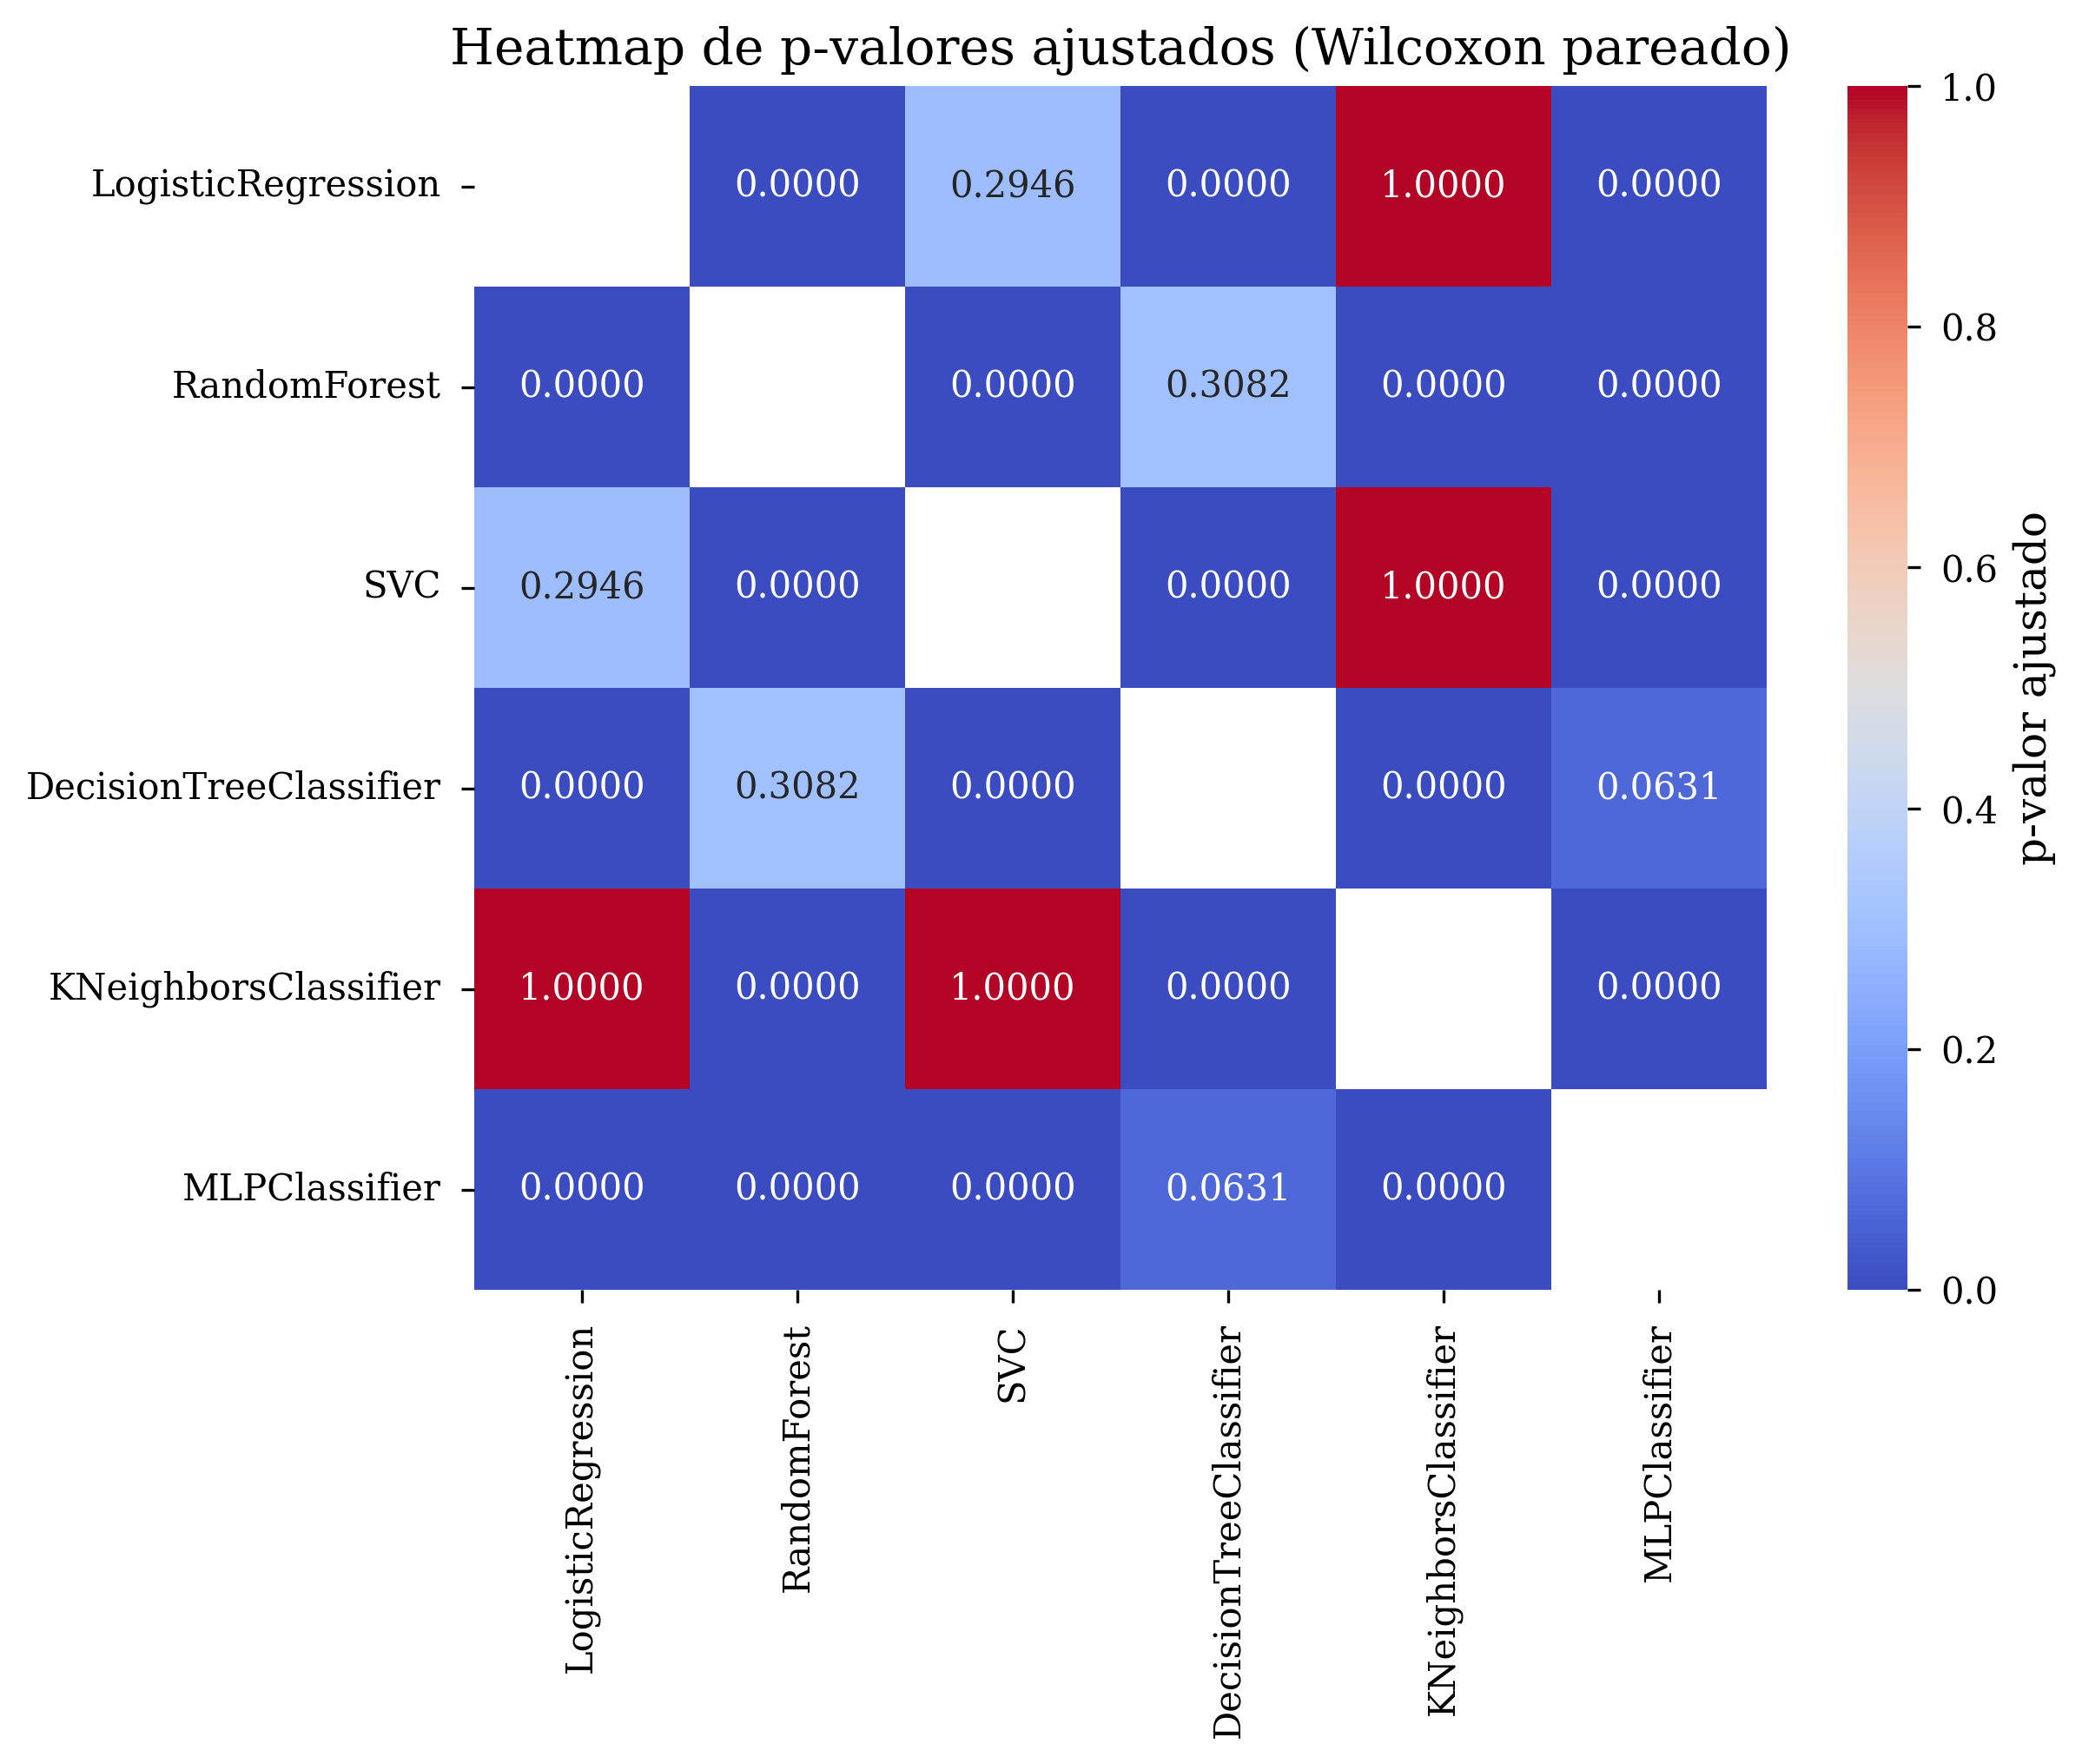

In [ ]:
alpha = 0.01
keys = list(cv_distributions.keys())
comparisons = list(combinations(keys, 2))

heatmap_matrix = np.full((len(keys), len(keys)), np.nan)

for a, b in comparisons:
    s1 = cv_distributions[a]['f1_macro']
    s2 = cv_distributions[b]['f1_macro']

    try:
        stat, pval = wilcoxon(s1, s2)
    except ValueError:
        pval = 1.0

    p_adj = min(pval * len(comparisons), 1.0)

    i = keys.index(a)
    j = keys.index(b)

    heatmap_matrix[i, j] = p_adj
    heatmap_matrix[j, i] = p_adj

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_matrix,
    xticklabels=keys,
    yticklabels=keys,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    cbar_kws={'label': 'p-valor ajustado'}
)
plt.title("Heatmap de p-valores ajustados (Wilcoxon pareado)")
plt.show()


In [ ]:
alpha = 0.01
keys = list(cv_distributions.keys())
comparisons = list(combinations(keys, 2))

heatmap_matrix = np.full((len(keys), len(keys)), np.nan)

for a, b in comparisons:
    s1 = cv_distributions[a]['accuracy']
    s2 = cv_distributions[b]['accuracy']

    try:
        stat, pval = wilcoxon(s1, s2)
    except ValueError:
        pval = 1.0

    p_adj = min(pval * len(comparisons), 1.0)

    i = keys.index(a)
    j = keys.index(b)

    heatmap_matrix[i, j] = p_adj
    heatmap_matrix[j, i] = p_adj

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_matrix,
    xticklabels=keys,
    yticklabels=keys,
    annot=True,
    fmt=".4f",
    cmap="coolwarm",
    cbar_kws={'label': 'p-valor ajustado'}
)
plt.title("Heatmap de p-valores ajustados (Wilcoxon pareado)")
plt.show()


In [ ]:
def ci95(scores, confidence=0.95):
    m    = scores.mean()
    se   = sem(scores)
    h    = se * t.ppf((1 + confidence) / 2, len(scores) - 1)
    return m, m-h, m+h

rows = []
for name, metrics in cv_distributions.items():
    m, lo, hi = ci95(metrics['f1_macro'])
    held = test_f1_scores[name]
    cv_time = cv_times[name]
    rows.append({
        'modelo':     name,
        'mean_cv':    m,
        'std_cv':     metrics['f1_macro'].std(),
        'heldout':    held,
        'train_time': str(timedelta(seconds=cv_time)),
        'ci95_lo':    lo,
        'ci95_hi':    hi,
    })

df_summary = pd.DataFrame(rows).set_index('modelo')
df_summary
